# Análise Exploratória de Dados (EDA) da Cerreira Fosta Ltda.

## Problema a Ser Resolvido:
1. Quais características estão relacionadas ao sucesso das vendas?
2. Como a concorrência interfere no desempenho da empresa?
3. Existem fatores específicos que indicam que uma oportunidade tem maior chance de ser fechada?
4. O que pode ser feito para otimizar as vendas?

In [ ]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Acessando o Drive que contém as bases de dados.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho completo dos arquivos
path_base_atualizada = "/content/drive/My Drive/Pasta_PTA/base_atualizada.parquet"

# Carregando as bases de dados
base_atualizada = pd.read_parquet('/content/drive/MyDrive/Pasta_PTA/base_atualizada.parquet')

### Análise Exploratória

Agora, iniciaremos a Análise Exploratória de Dados (EDA), estruturando-a em etapas para garantir uma investigação mais organizada e detalhada. O primeiro passo será realizar uma análise geral da base base_atualizada, com o objetivo de identificar padrões e obter insights iniciais.

Nas etapas seguintes, aprofundaremos em aspectos específicos, como o impacto das variáveis numéricas e categóricas, avaliando suas correlações e como podem influenciar no desempenho de vendas das lojas. Durante a análise, utilizaremos gráficos e visualizações para explorar relações entre as variáveis e extrair informações valiosas para os objetivos do projeto.



In [ ]:
# Verificação da base de dados.
base_atualizada.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,Sexta-Feira,2015-07-31,5263,555,1,1,0,1,c,Básico,"1,270.00",Setembro,"2,008.00",0,NaN,NaN,Não existe o intervalo dos meses
1,2,Sexta-Feira,2015-07-31,6064,625,1,1,0,1,a,Básico,570.00,Novembro,"2,007.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
2,3,Sexta-Feira,2015-07-31,8314,821,1,1,0,1,a,Básico,"14,130.00",Dezembro,"2,006.00",1,14.00,"2,011.00","Jan,Apr,Jul,Oct"
3,4,Sexta-Feira,2015-07-31,13995,1498,1,1,0,1,c,Estendido,620.00,Setembro,"2,009.00",0,NaN,NaN,Não existe o intervalo dos meses
4,5,Sexta-Feira,2015-07-31,4822,559,1,1,0,1,a,Básico,"29,910.00",Abril,"2,015.00",0,NaN,NaN,Não existe o intervalo dos meses


In [ ]:
# Verificando dados duplicados
base_atualizada.duplicated().sum()


0

In [ ]:
# Verificação das informações gerais da base tratada.
base_atualizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  object        
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nota-se uma coluna desnecessária chamada "Unnamed: 0" e será necessária a

---

exclusão da base atualizada.

In [ ]:
# Checando se coluna foi devidamente excluída
base_atualizada.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,Sexta-Feira,2015-07-31,5263,555,1,1,0,1,c,Básico,"1,270.00",Setembro,"2,008.00",0,NaN,NaN,Não existe o intervalo dos meses
1,2,Sexta-Feira,2015-07-31,6064,625,1,1,0,1,a,Básico,570.00,Novembro,"2,007.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
2,3,Sexta-Feira,2015-07-31,8314,821,1,1,0,1,a,Básico,"14,130.00",Dezembro,"2,006.00",1,14.00,"2,011.00","Jan,Apr,Jul,Oct"
3,4,Sexta-Feira,2015-07-31,13995,1498,1,1,0,1,c,Estendido,620.00,Setembro,"2,009.00",0,NaN,NaN,Não existe o intervalo dos meses
4,5,Sexta-Feira,2015-07-31,4822,559,1,1,0,1,a,Básico,"29,910.00",Abril,"2,015.00",0,NaN,NaN,Não existe o intervalo dos meses


## Dicionário dos Dados
- Store: Identificação exclusiva de cada loja.
- DayOfWeek: Dia da semana.
- Date: Data específica no formato AAAA-MM-DD.
- Sales: Volume de vendas realizado em um determinado dia.
- Customers: Número de clientes atendidos em um determinado dia.
- Open: Status de abertura da loja.
- Promo: Indicador de promoção na loja.
- StateHoliday: Tipo de feriado estadual.
- SchoolHoliday: Indicador de impacto do fechamento de escolas.
- Assortment: Nível de sortimento das lojas.
- CompetitionDistance: Distância em metros até a loja concorrente mais próxima.
- CompetitionOpenSinceMonth: Mês aproximado da abertura do concorrente mais próximo.
- CompetitionOpenSinceYear: Ano aproximado da abertura do concorrente mais próximo.
- Promo2: Participação da loja em promoções contínuas.
- Promo2SinceYear: Ano em que a loja começou a participar da promoção contínua.
- Promo2SinceWeek: Semana do calendário em que a loja começou a participar da promoção contínua.
- PromoInterval: Meses em que a promoção contínua é iniciada novamente.

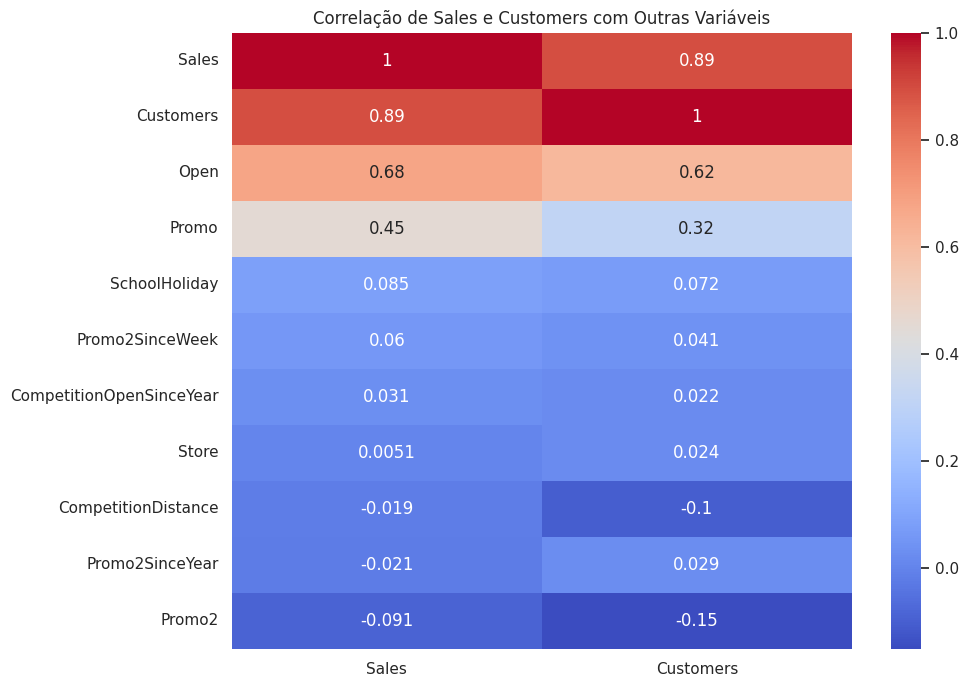

In [ ]:
# Filtrando apenas colunas numéricas
numeric_data = base_atualizada.select_dtypes(include=['float64', 'int64'])

# Calculando a correlação para 'Sales' e 'Customers' em relação às demais variáveis
sales_customers_corr = numeric_data.corr()[['Sales', 'Customers']].sort_values(by='Sales', ascending=False)

# Criando o heatmap para 'Sales' e 'Customers'
plt.figure(figsize=(10, 8))
sns.heatmap(sales_customers_corr, annot=True, cmap='coolwarm')
plt.title('Correlação de Sales e Customers com Outras Variáveis')
plt.show()

### Explicação Sobre a Correlação das Variáveis Numéricas.

O foco deste mapa de correlação é compreender a relação entre as variáveis numéricas presentes no conjunto de dados, com especial atenção para a variável **Sales**, que representa o volume de vendas diárias das lojas. Essa análise é crucial para identificar quais fatores têm maior influência sobre as vendas e para descobrir padrões que podem impactar o desempenho das lojas.

Quanto mais próximo de 0, mais fraca é a correlação entre as variáveis, indicando pouca ou nenhuma relação linear entre elas. Por outro lado, quanto mais distante de 0 (em direção a -1 ou 1), mais forte é a correlação. Um valor de -1 indica uma correlação negativa perfeita, enquanto 1 indica uma correlação positiva perfeita. Os valores variam entre -1 e 1.

### Conclusões Sobre a Correlação entre as Variáveis Numéricas.

- A variável Customers apresenta uma correlação positiva forte (0.89) com Sales, o que é esperado, já que o número de clientes impacta diretamente o volume de vendas.
- Open também possui uma correlação moderada positiva (0.68) com Sales, indicando que, naturalmente, as vendas dependem diretamente de as lojas estarem abertas.
- Promo mostra uma correlação positiva moderada (0.45) com Sales, sugerindo que promoções são eficazes para aumentar o volume de vendas.
- As variáveis relacionadas à competição, como CompetitionDistance, CompetitionOpenSinceMonth, e CompetitionOpenSinceYear, apresentam correlações muito fracas, indicando que a proximidade e o tempo de existência de concorrentes podem não ser fatores determinantes para as vendas.


Embora algumas variáveis apresentem correlações mais fracas, é essencial realizar uma análise mais aprofundada para explorar interações não lineares ou padrões específicos. Além disso, as variáveis categóricas podem ter impacto relevante em subgrupos de dados, exigindo investigações adicionais.

## Padronização dos Dados das Variáveis Numéricas

Nessa etapa, vamos concluir a padronização dos dados, tornando-os mais intuitivos e organizados para análises futuras. Essa padronização começou na fase de tratamento, onde focamos nas variáveis categóricas, substituindo valores não intuitivos ou rótulos abreviados por descrições mais claras, facilitando a interpretação durante a EDA (Análise Exploratória de Dados).

No entanto, as variáveis numéricas foram mantidas em seu formato original até agora. Isso foi feito propositalmente para garantir que pudéssemos gerar gráficos de correlação e compreender melhor o comportamento das variáveis numéricas e como elas se relacionam, especialmente em relação à variável Sales, que é o principal foco da análise.

Nesta etapa, garantiremos que as variáveis numéricas e categóricas estejam organizadas de forma consistente, preservando o formato adequado para visualizações, cálculos estatísticos e correlações. Assim, completamos a padronização dos dados sem comprometer a análise detalhada do conjunto de dados.


Essa alteração será feita porque, como estamos trabalhando em um projeto de análise de dados e não em um modelo de machine learning, a representação dos meses como strings torna os dados mais intuitivos e de fácil interpretação, especialmente durante a visualização e análise dos dados na EDA.

Para começar a parte de padronização dos dados, padronizamos os dados da coluna Promo2, que indica a participação das lojas em promoções contínuas e consecutivas. Originalmente, essa coluna utilizava rótulos numéricos:

- 0: Loja não está participando.
- 1: Loja está participando.

In [ ]:
# Renomeando os valores para descrições mais claras
rename_promo2 = {
    0: 'Loja não está participando',
    1: 'Loja está participando'
}

# Atualizando a coluna 'Promo2'
base_atualizada['Promo2'] = base_atualizada['Promo2'].map(rename_promo2)

# Verificando a coluna 'Promo2'
display((base_atualizada['Promo2']))


,Promo2
0,Loja não está participando
1,Loja está participando
2,Loja está participando
3,Loja não está participando
4,Loja não está participando
...,...
1017204,Loja está participando
1017205,Loja não está participando
1017206,Loja não está participando
1017207,Loja não está participando


A próxima etapa na organização da base "Train" será padronizar a coluna Open, que atualmente utiliza valores numéricos para indicar o status de abertura das lojas:

- 0: Loja fechada.
- 1: Loja aberta.

In [ ]:
# Renomeando os valores da coluna 'Open' para strings descritivas
rename_open = {
    0: 'Fechada',
    1: 'Aberta'
}

# Atualizando a coluna 'Open'
base_atualizada['Open'] = base_atualizada['Open'].map(rename_open)

# Verificando a coluna 'Open'
display(base_atualizada['Open'])

,Open
0,Aberta
1,Aberta
2,Aberta
3,Aberta
4,Aberta
...,...
1017204,Fechada
1017205,Fechada
1017206,Fechada
1017207,Fechada


Nesta etapa, iremos padronizar a coluna Promo, que atualmente utiliza valores numéricos para indicar se uma loja estava participando de uma promoção em um determinado dia:

- 0: Não há promoção.
- 1: Loja em promoção

In [ ]:
# Renomeando os valores da coluna 'Promo' para strings descritivas
rename_promo = {
    0: 'Não há Promoção',
    1: 'Loja em Promoção'
}

# Atualizando a coluna 'Promo'
base_atualizada['Promo'] = base_atualizada['Promo'].map(rename_promo)

# Verificando a coluna 'Promo'
display(base_atualizada['Promo'])

,Promo
0,Loja em Promoção
1,Loja em Promoção
2,Loja em Promoção
3,Loja em Promoção
4,Loja em Promoção
...,...
1017204,Não há Promoção
1017205,Não há Promoção
1017206,Não há Promoção
1017207,Não há Promoção


Para finalizar a padronização, iremos ajustar a coluna SchoolHoliday, que indica se uma loja foi impactada pelo fechamento de escolas públicas em uma determinada data:

- 0: Escolas abertas.
- 1: Escolas fechadas.

In [ ]:
# # Renomeando os valores da coluna 'SchoolHoliday' para strings descritivas
school_holiday_mapping = {
    0: 'Escolas Abertas',
    1: 'Escolas Fechadas'
}

# Atualizando a coluna 'SchoolHoliday'
base_atualizada['SchoolHoliday'] = base_atualizada['SchoolHoliday'].map(school_holiday_mapping)

# Verificando a coluna 'SchoolHoliday'
display(base_atualizada['SchoolHoliday'])

,SchoolHoliday
0,Escolas Fechadas
1,Escolas Fechadas
2,Escolas Fechadas
3,Escolas Fechadas
4,Escolas Fechadas
...,...
1017204,Escolas Fechadas
1017205,Escolas Fechadas
1017206,Escolas Fechadas
1017207,Escolas Fechadas


Além disso, vamos criar colunas dos meses e dos dias do ano a fim de realizar futuras análises.

In [ ]:
# coluna de meses baseado na coluna de "Date"
base_atualizada['Meses'] = base_atualizada['Date'].dt.month

# coluna de dias baseado na coluna de "Date"
base_atualizada['Dias'] = base_atualizada['Date'].dt.day

In [ ]:
# salvando a base de dados ignorando o índice
base_atualizada.to_parquet('/content/drive/MyDrive/Pasta_PTA/base_padronizada.parquet', index=False)

# Análise Univariada
Nesta etapa, iniciaremos a exploração detalhada dos dados da Cerreira Fosta Ltda., com o objetivo de entender as características de cada variável isoladamente. Essa análise visa identificar padrões gerais, distribuições e possíveis outliers que possam impactar a interpretação dos resultados ou a qualidade das análises futuras.

Com base no mapa de correlação gerado, observamos que as variáveis Sales e Customers são altamente relacionadas e de grande relevância para o projeto. Além disso, variáveis como Promo, Open, e DayOfWeek também demonstram impacto significativo no comportamento das vendas, enquanto outras variáveis apresentam correlações mais fracas.

### Sales
Vamos começar a análise pela variável mais importante da base de dados, a "sales".

In [ ]:
# Exibindo o resumo estatístico sem notação científica
base_atualizada['Sales'].describe().apply(lambda x: f"{x:.2f}")

,Sales
count,1017209.00
mean,5773.82
std,3849.93
min,0.00
25%,3727.00
50%,5744.00
75%,7856.00
max,41551.00


A mediana, de 5.744,00, está próxima à média, sugerindo uma distribuição relativamente simétrica, embora o valor máximo de 41.551,00 seja bastante elevado em comparação ao terceiro quartil (7.856,00), indicando a presença de possíveis outliers. O valor mínimo de 0,00 também sugere que há dias em que algumas lojas não realizaram vendas, possivelmente devido a fechamento ou eventos excepcionais. Esses pontos indicam que os dados estão bem estruturados, mas será importante investigar os valores extremos para garantir a qualidade das análises futuras.

Para checar a distribuição dos dados vamos gerar um histograma e um boxplot para entender melhor o comportamento dos dados.

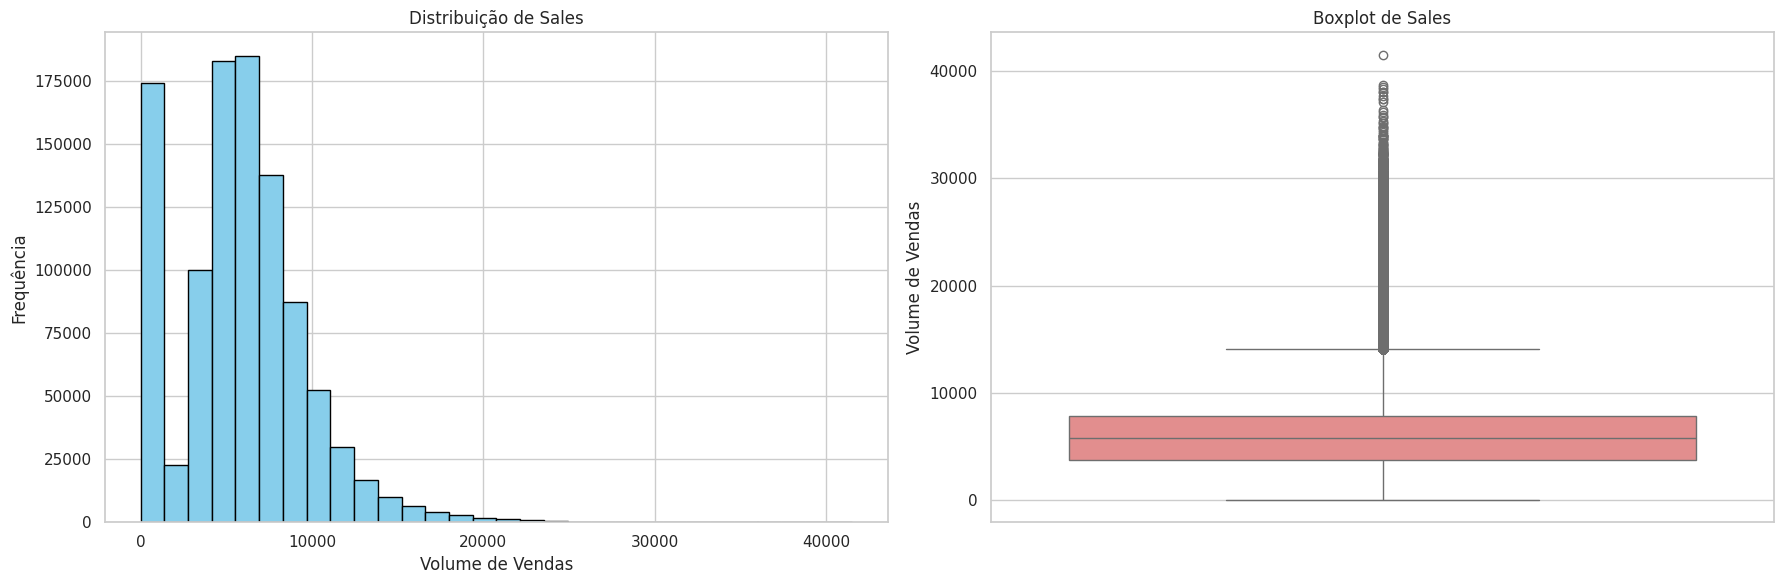

In [ ]:
# Configurando layout para gráficos lado a lado
plt.figure(figsize=(18, 6))

# Histograma para visualizar a distribuição de 'Sales'
plt.subplot(1, 2, 1)
plt.hist(base_atualizada['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Sales')
plt.xlabel('Volume de Vendas')
plt.ylabel('Frequência')

# Boxplot para identificar outliers em 'Sales'
plt.subplot(1, 2, 2)
sns.boxplot(data=base_atualizada, y='Sales', color='lightcoral')
plt.title('Boxplot de Sales')
plt.ylabel('Volume de Vendas')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


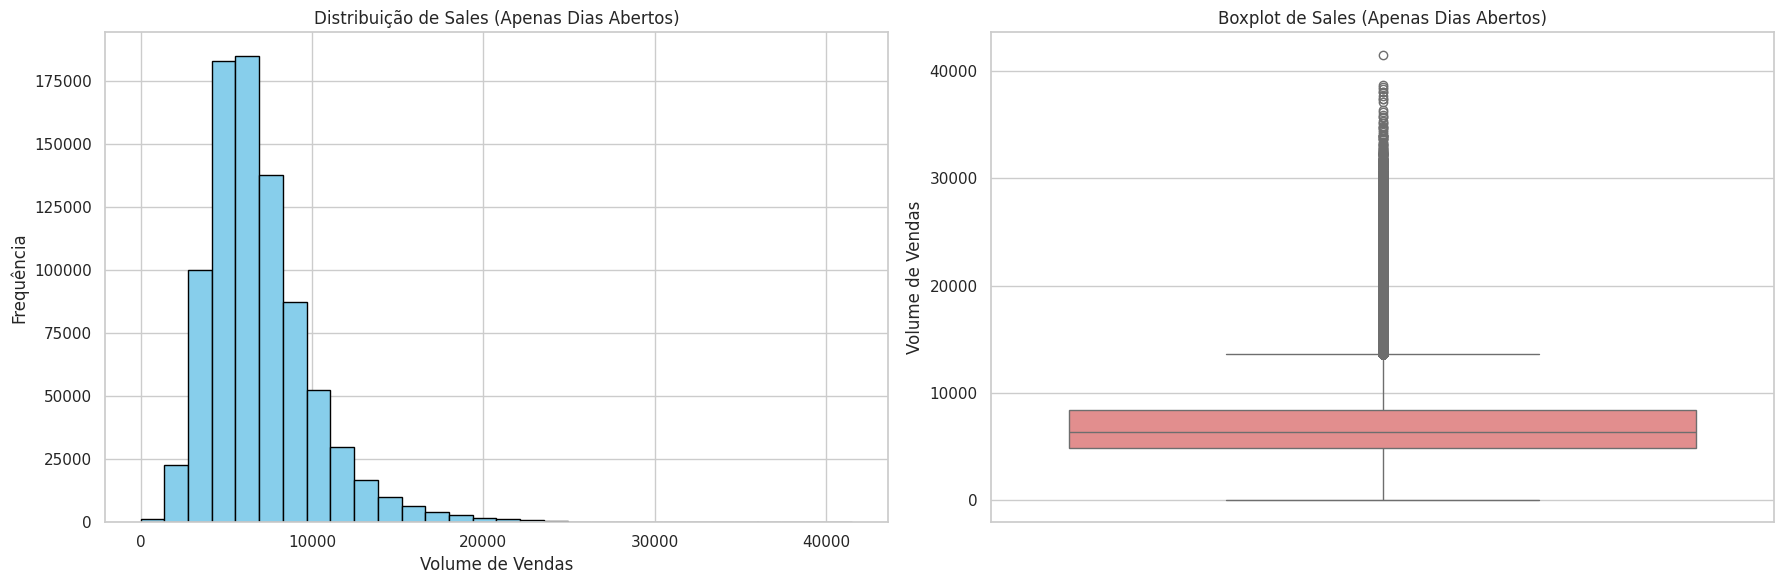

In [ ]:
# Filtrando a base para considerar apenas os dias em que as lojas estavam abertas
base_aberta = base_atualizada[base_atualizada['Open'] == "Aberta"]

# Configurando layout para gráficos lado a lado
plt.figure(figsize=(18, 6))

# Histograma para visualizar a distribuição de 'Sales' (apenas dias abertos)
plt.subplot(1, 2, 1)
plt.hist(base_aberta['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Sales (Apenas Dias Abertos)')
plt.xlabel('Volume de Vendas')
plt.ylabel('Frequência')

# Boxplot para identificar outliers em 'Sales' (apenas dias abertos)
plt.subplot(1, 2, 2)
sns.boxplot(data=base_aberta, y='Sales', color='lightcoral')
plt.title('Boxplot de Sales (Apenas Dias Abertos)')
plt.ylabel('Volume de Vendas')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


- A análise do histograma permite perceber que a maioria das vendas baixas está diretamente relacionada com os dias em que as lojas estavam fechadas. Essa conclusão foi identificada ao comparar os dois histogramas: um incluindo todos os dias e outro considerando apenas os dias em que as lojas estavam abertas. Quando excluímos os dias em que as lojas estavam fechadas, a concentração de vendas nos níveis mais baixos diminui drasticamente, reforçando que os dias de fechamento têm impacto significativo nos dados e nas métricas de desempenho. Essa observação destaca a importância de filtrar os dados adequadamente para obter insights mais precisos sobre o desempenho real das lojas.

- Além disso, os valores máximos de vendas, embora raros, destacam dias ou eventos específicos em que o volume de vendas foi extremamente alto. Esses picos podem ser causados por promoções de grande impacto, eventos sazonais, como feriados ou datas comemorativas, ou lançamentos de produtos e campanhas de marketing específicas. Investigar esses dias com vendas altas pode ajudar a identificar os fatores responsáveis por esses picos e replicar as estratégias em outras lojas ou períodos.

- Esses valores extremos, representados pelos pontos acima do limite superior, indicam que existem lojas ou dias específicos com volumes de vendas muito altos. Esses eventos podem ser causados por promoções, sazonalidades, ou outros fatores externos, e precisam ser investigados mais profundamente para entender sua origem e impacto.

### Customers
A variável Customers representa o número de clientes atendidos em um determinado dia. Ela é uma das variáveis mais importantes do conjunto de dados, pois o fluxo de clientes está diretamente relacionado ao desempenho das lojas e ao volume de vendas.

Nesta etapa, exploraremos a variável Customers de forma univariada, analisando sua distribuição e identificando possíveis padrões ou outliers que possam influenciar as análises futuras.

In [ ]:
base_atualizada['Customers'].describe().apply(lambda x: f"{x:.2f}")

,Customers
count,1017209.00
mean,633.15
std,464.41
min,0.00
25%,405.00
50%,609.00
75%,837.00
max,7388.00


A análise da variável Customers revela que há 1.017.209 registros, sem valores ausentes. A média do número de clientes atendidos por dia é de aproximadamente 633,15, com um desvio padrão de 464,41, indicando uma variabilidade significativa no fluxo de clientes entre as lojas e ao longo do tempo.

Os valores mínimos e máximos vão de 0 clientes (dias sem atendimento, possivelmente devido a fechamento) até 7.388 clientes, que representa um fluxo extremamente alto e possivelmente um outlier. A mediana, de 609, está próxima à média, sugerindo que a distribuição é relativamente simétrica, mas o valor máximo aponta para a presença de valores extremos.

Para aprofundar a análise, o próximo passo será gerar um histograma para visualizar a distribuição da variável Customers e identificar padrões gerais, como a frequência de intervalos de clientes atendidos e possíveis concentrações de valores. Essa visualização permitirá tirar melhores conclusões sobre o comportamento dos dados.

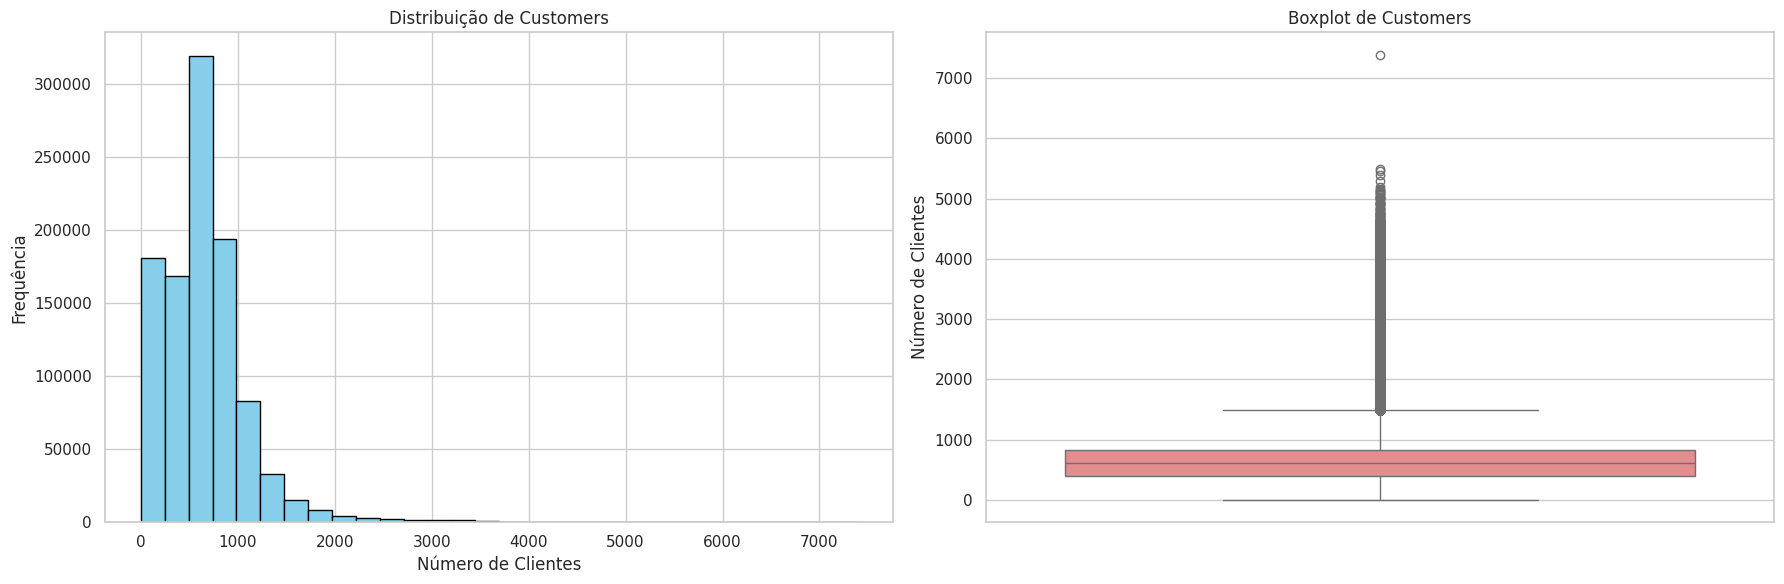

In [ ]:
# Configurando layout para gráficos lado a lado
plt.figure(figsize=(18, 6))

# Histograma para visualizar a distribuição de 'Customers'
plt.subplot(1, 2, 1)
plt.hist(base_atualizada['Customers'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Customers')
plt.xlabel('Número de Clientes')
plt.ylabel('Frequência')

# Boxplot para identificar outliers em 'Customers'
plt.subplot(1, 2, 2)
sns.boxplot(data=base_atualizada, y='Customers', color='lightcoral')
plt.title('Boxplot de Customers')
plt.ylabel('Número de Clientes')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

- O histograma que inclui todos os dias revela uma concentração considerável de registros abaixo de 500 clientes, refletindo tanto os dias em que as lojas estavam abertas quanto os dias fechados. Esses registros de baixo atendimento, frequentemente associados a vendas nulas ou muito baixas, são diretamente impactados pelos dias de fechamento. Ao excluir os dias em que as lojas estavam fechadas, o histograma mostra uma distribuição mais clara do fluxo de clientes em dias operacionais. A maioria das lojas atende entre 500 e 1.000 clientes nesses dias, o que reflete melhor o desempenho real das operações. O número reduzido de registros abaixo de 500 clientes sugere que os dias de fechamento distorciam as estatísticas gerais.

- Além disso, a cauda longa à direita no histograma e os outliers destacados no boxplot revelam dias com um número atipicamente alto de clientes, ultrapassando 2.000 e chegando até 7.000 em casos extremos. Esses valores podem estar associados a eventos específicos, como promoções de grande impacto, sazonalidades ou ações de marketing bem-sucedidas. Esses eventos mostram que há potencial para aumentar o fluxo de clientes, mas é necessário entender melhor quais fatores impulsionam esses resultados excepcionais.


- O boxplot da variável Customers confirma a presença de outliers significativos, que já haviam sido indicados pelo histograma. A maior parte dos registros está concentrada entre 400 e 1.000 clientes, com poucos valores ultrapassando 2.000 clientes. A mediana está bem posicionada no centro da caixa, o que reflete uma distribuição centralizada dentro desse intervalo principal.

- No entanto, os outliers destacados acima do limite superior representam dias atípicos com um número muito elevado de clientes, como os casos próximos a 7.000 clientes, que são bastante raros. Esses valores extremos podem estar associados a eventos específicos, como grandes promoções, sazonalidades ou erros nos dados, e merecem investigação adicional para confirmar sua legitimidade.

### Open
A variável Open é binária e indica se a loja estava aberta em um determinado dia. É representada pelos valores: 1, quando a loja está aberta e 0 quando a loja está fechada.

Essa variável é essencial para compreender o impacto do funcionamento das lojas no volume de vendas e no fluxo de clientes. Nesta análise, exploraremos a variável Open de forma univariada para entender a frequência de dias abertos e fechados, além de identificar se há alguma anormalidade ou padrão específico.



In [ ]:
# Resumo estatístico da variável 'Open'
print(base_atualizada['Open'].value_counts())
print(base_atualizada['Open'].value_counts(normalize=True) * 100)

Open
Aberta     844392
Fechada    172817
Name: count, dtype: int64
Open
Aberta    83.01
Fechada   16.99
Name: proportion, dtype: float64


A análise da variável Open revela que, no total, as lojas estiveram abertas em 844.392 dias, representando 83,01% do conjunto de dados, e estiveram fechadas em 172.817 dias, correspondendo a 16,99%.

Isso indica que, na maior parte do tempo, as lojas estavam funcionando normalmente, enquanto o fechamento ocorreu em uma fração menor dos registros, possivelmente devido a feriados, eventos específicos ou dias regulares de fechamento.

O próximo passo será gerar um gráfico de barras para visualizar a frequência de dias em que as lojas estavam abertas ou fechadas, o que ajudará a consolidar essa análise e a identificar qualquer padrão visual relacionado ao funcionamento das lojas.

<ipython-input-99-5fe467f36d73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base_atualizada, x='Open', palette='coolwarm')


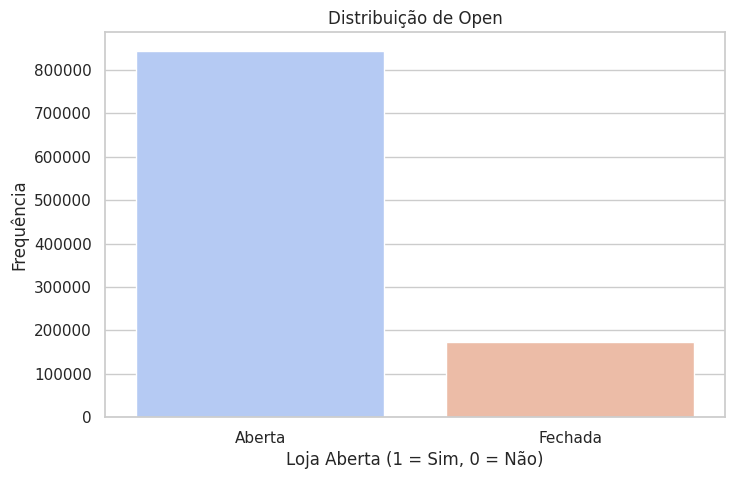

In [ ]:
# Gráfico de barras para visualizar a distribuição de 'Open'
plt.figure(figsize=(8, 5))
sns.countplot(data=base_atualizada, x='Open', palette='coolwarm')
plt.title('Distribuição de Open')
plt.xlabel('Loja Aberta (1 = Sim, 0 = Não)')
plt.ylabel('Frequência')
plt.show()


O gráfico de barras da variável Open confirma que, na maior parte do tempo, as lojas estiveram abertas. Isso reflete um padrão esperado de operação, com as lojas fechando em uma proporção relativamente pequena, possivelmente devido a fatores como feriados, manutenções programadas ou outras circunstâncias específicas. A predominância de dias abertos indica que a operação regular é o foco principal da análise.

### Promo
A variável Promo indica se uma loja estava realizando uma promoção em um determinado dia, sendo representada por valores binários (0 para dias sem promoção e 1 para dias com promoção). Essa variável é crucial para entender o impacto das promoções no comportamento de vendas e no desempenho geral das lojas da Cerreira Fosta Ltda..

Nesta etapa, faremos uma análise detalhada da variável Promo de forma univariada, explorando sua distribuição e entendendo como as promoções estão distribuídas no conjunto de dados. Além disso, essa análise nos permitirá identificar padrões que possam influenciar decisões futuras, como o planejamento de campanhas promocionais.

In [ ]:
# Resumo estatístico da variável 'Promo'
print(base_atualizada['Promo'].value_counts())
print(base_atualizada['Promo'].value_counts(normalize=True) * 100)

Promo
Não há Promoção     629129
Loja em Promoção    388080
Name: count, dtype: int64
Promo
Não há Promoção    61.85
Loja em Promoção   38.15
Name: proportion, dtype: float64


A análise inicial da variável Promo revela que, em 61,85% dos dias, as lojas não estavam realizando promoções, enquanto em 38,15% dos dias, as lojas estavam em promoção. Isso mostra que as promoções ocorrem em uma parcela considerável do tempo, mas os dias sem promoção ainda predominam.

Essa distribuição demonstra que as promoções são uma prática recorrente, mas não predominante. Para aprofundar a análise, o próximo passo será explorar graficamente a frequência de dias com e sem promoção por meio de um gráfico de barras, seguido de uma análise mais detalhada sobre o impacto das promoções no volume de vendas. Isso ajudará a identificar o peso das promoções no comportamento das lojas

<ipython-input-101-1a57efb74775>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base_atualizada, x='Promo', palette='coolwarm')


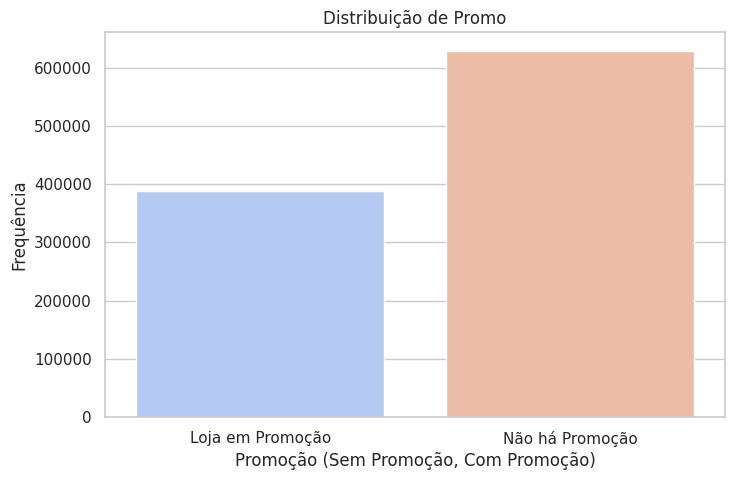

In [ ]:
# Gráfico de barras para visualizar a distribuição de 'Promo'
plt.figure(figsize=(8, 5))
sns.countplot(data=base_atualizada, x='Promo', palette='coolwarm')
plt.title('Distribuição de Promo')
plt.xlabel('Promoção (Sem Promoção, Com Promoção)')
plt.ylabel('Frequência')
plt.show()

O gráfico de barras confirma que os dias sem promoção predominam no conjunto de dados, com mais de 600.000 registros, enquanto os dias com promoção correspondem a cerca de 400.000 registros. Apesar da diferença, observa-se que as promoções são uma estratégia recorrente, sendo utilizadas em uma proporção significativa do tempo pela Cerreira Fosta Ltda..

### Competition Distance
 variável CompetitionDistance representa a distância, em metros, da loja mais próxima concorrente. Essa variável é importante para entender como a proximidade de concorrentes pode influenciar o desempenho das lojas, tanto no fluxo de clientes quanto no volume de vendas.

Nesta análise univariada, iremos explorar a distribuição dos valores de distância, identificar possíveis outliers e entender os padrões gerais associados à presença de concorrentes próximos ou distantes.

In [ ]:
# Alterando a notação científica para decimal
pd.options.display.float_format = '{:,.2f}'.format

# Resumo estatístico da variável 'CompetitionDistance'
print(base_atualizada['CompetitionDistance'].describe())


count   1,014,567.00
mean        5,430.09
std         7,715.32
min            20.00
25%           710.00
50%         2,330.00
75%         6,890.00
max        75,860.00
Name: CompetitionDistance, dtype: float64


A elevada dispersão nos dados, evidenciada pelo desvio padrão elevado e pela distância máxima significativa, reflete a ampla variabilidade na coluna CompetitionDistance. Essa variabilidade indica a diversidade nas localizações das lojas em relação aos seus concorrentes, sem sinais de distorções causadas por valores nulos ou ausentes.

Essa dispersão pode ser explicada pela diversidade geográfica das lojas, com algumas localizadas próximas de concorrentes e outras em regiões com pouca ou nenhuma concorrência em distâncias curtas. Esse comportamento sugere que as lojas enfrentam diferentes realidades de mercado, o que é essencial para análises mais específicas de performance e estratégias competitivas.

Esses pontos serão melhor analisados com o histograma e o boxplot, que permitirão visualizar a distribuição geral e os valores extremos de maneira mais clara.

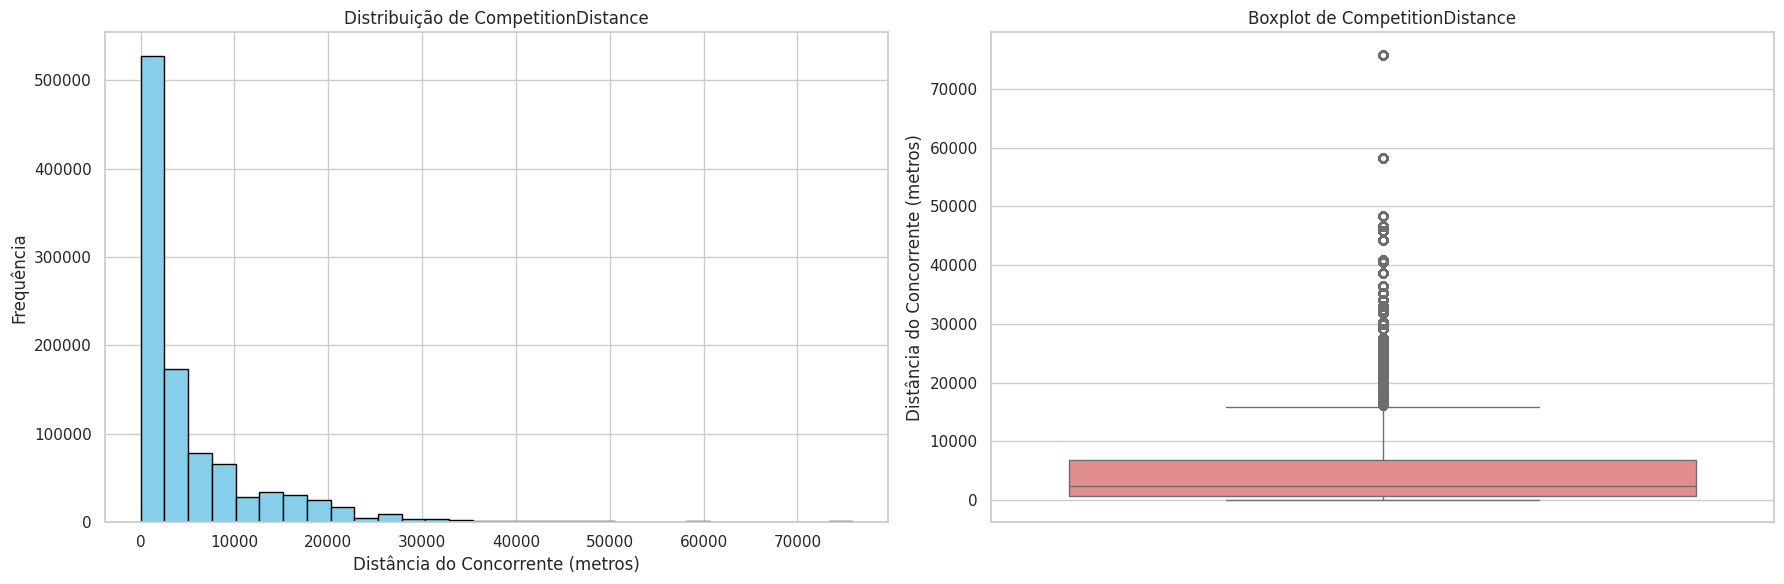

In [ ]:
# Configurando layout para gráficos lado a lado
plt.figure(figsize=(18, 6))

# Histograma para visualizar a distribuição de 'CompetitionDistance'
plt.subplot(1, 2, 1)
plt.hist(base_atualizada['CompetitionDistance'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de CompetitionDistance')
plt.xlabel('Distância do Concorrente (metros)')
plt.ylabel('Frequência')

# Boxplot para identificar outliers em 'CompetitionDistance'
plt.subplot(1, 2, 2)
sns.boxplot(data=base_atualizada, y='CompetitionDistance', color='lightcoral')
plt.title('Boxplot de CompetitionDistance')
plt.ylabel('Distância do Concorrente (metros)')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


- A maior parte das lojas está localizada a menos de 10.000 metros de seus concorrentes, com um pico de frequência entre 0 e 2.000 metros. Isso sugere que a proximidade com a concorrência é uma característica comum e pode estar diretamente relacionada à atratividade das regiões em que as lojas estão situadas. No entanto, a presença de lojas a mais de 70.000 metros de distância reflete outliers, que podem ser lojas em áreas remotas ou que enfrentam pouca ou nenhuma competição local. Esses casos devem ser analisados mais profundamente, pois podem representar oportunidades ou desafios únicos.

- Esses dados podem ajudar a Cerreira Fosta Ltda. a entender como a proximidade dos concorrentes afeta o desempenho. Por exemplo, regiões com alta densidade de concorrência podem exigir estratégias mais agressivas de marketing ou diferenciação de produtos. Já as lojas em áreas remotas podem ter um mercado menos saturado, mas também podem enfrentar desafios como menor fluxo de clientes ou custos operacionais mais altos.


# Análise Bivariada

Nesta etapa, iniciaremos a exploração detalhada dos dados da Cerreira Fosta Ltda., com o objetivo de entender as relações das vendas e clientes em relação às outras colunas da base de dados.

Agora, vamos correlacionar nossas coluna a fim de obter insights para ajudar a Cerreira Fosta a otimizar as vendas.

## Definindo funções

Primeiramente, iremos definir funções que irão auxiliar a nossa obtenção de gráficos.

In [ ]:
import matplotlib.colors as mcolors

In [ ]:
muted_colors = sns.color_palette("muted", 12)

# Convertendo as cores para o formato RGB
rgb_colors = [mcolors.to_rgb(color) for color in muted_colors]

# Criando um array com as cores em formato hexadecimal
hex_colors = [mcolors.to_hex(color) for color in rgb_colors]

In [ ]:
def dois_graficos(dataframe, coluna_x, xlabel, ordem_especifica=None, ylim_esquerda=0, ylim_direita=0):
  # agrupando os valores baseados na coluna_x e obtendo as médias de vendas e de clientes
  grupo_vendas = dataframe.groupby(coluna_x)[['Sales']].mean()
  grupo_clientes = dataframe.groupby(coluna_x)[['Customers']].mean()

  plt.figure(figsize=(18, 6))

  # realizando o gráfico que relaciona com a média de vendas
  plt.subplot(1, 2, 1)
  plt.bar(grupo_vendas.loc[ordem_especifica].index, grupo_vendas.loc[ordem_especifica, 'Sales'], color=hex_colors)
  # sns.barplot(x=coluna_x, y="Sales", data=dataframe, order=ordem_especifica, palette='muted', hue=coluna_x, legend=False)
  plt.title(f"Relação entre Média de Vendas e {xlabel}")
  plt.xlabel(xlabel)
  plt.ylabel("Média de Vendas")
  plt.ylim(bottom=ylim_esquerda)

  plt.tight_layout()
  plt.grid()

  # realizando gráfico que relaciona com a média de clientes
  plt.subplot(1, 2, 2)
  plt.bar(grupo_clientes.loc[ordem_especifica].index, grupo_clientes.loc[ordem_especifica, 'Customers'], color=hex_colors)
  # sns.barplot(x=coluna_x, y="Customers", data=dataframe, order=ordem_especifica, palette='muted', hue=coluna_x, legend=False)
  plt.title(f"Relação entre Média de Clientes e {xlabel}")
  plt.xlabel(xlabel)
  plt.ylabel("Média de Clientes")
  plt.ylim(bottom=ylim_direita)

  plt.tight_layout()
  plt.grid()

  plt.show()

In [ ]:
# função para criar gráficos de barras voltados para a análise de concorrentes
def plot_bar_relation(data, x_col, y_col, title, xlabel, ylabel, ordem_especifica=None, figsize=(10, 6), ylim=0):
    plt.figure(figsize=figsize)
    sns.barplot(data=data, x=x_col, y=y_col, errorbar=None, order=ordem_especifica, palette="viridis", hue=x_col, legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.ylim(bottom=ylim)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Análise de Público-Alvo

Primeiramente, devemos identificar quais são os perfis de clientes das unidades da Cerreira Fosta.

Com o conhecimento acerca do público-alvo podemos otimizar as vendas a fim de ajudar a empresa.

### Relação entre tipo de loja, vendas e clientes

Vamos começar nossas análises de público-alvo analisando primeiramente qual é o tipo de loja preferido dentre as diversas unidades da Cerreira Fosta.

A fim de complementar a análise de perfil de público-alvo, vamos analisar mais profundamente acerca dos dias da semana mais prováveis de terem vendas efetivadas e maior circulação dos clientes.

Vamos realizar esta análise através de gráficos de barra para obter melhor entendimento e fácil visualização das análises.

In [ ]:
# guardando em uma lista uma ordem específica das lojas que queremos que apareça no gráfico
order_stores = ['a', 'b', 'c', 'd']

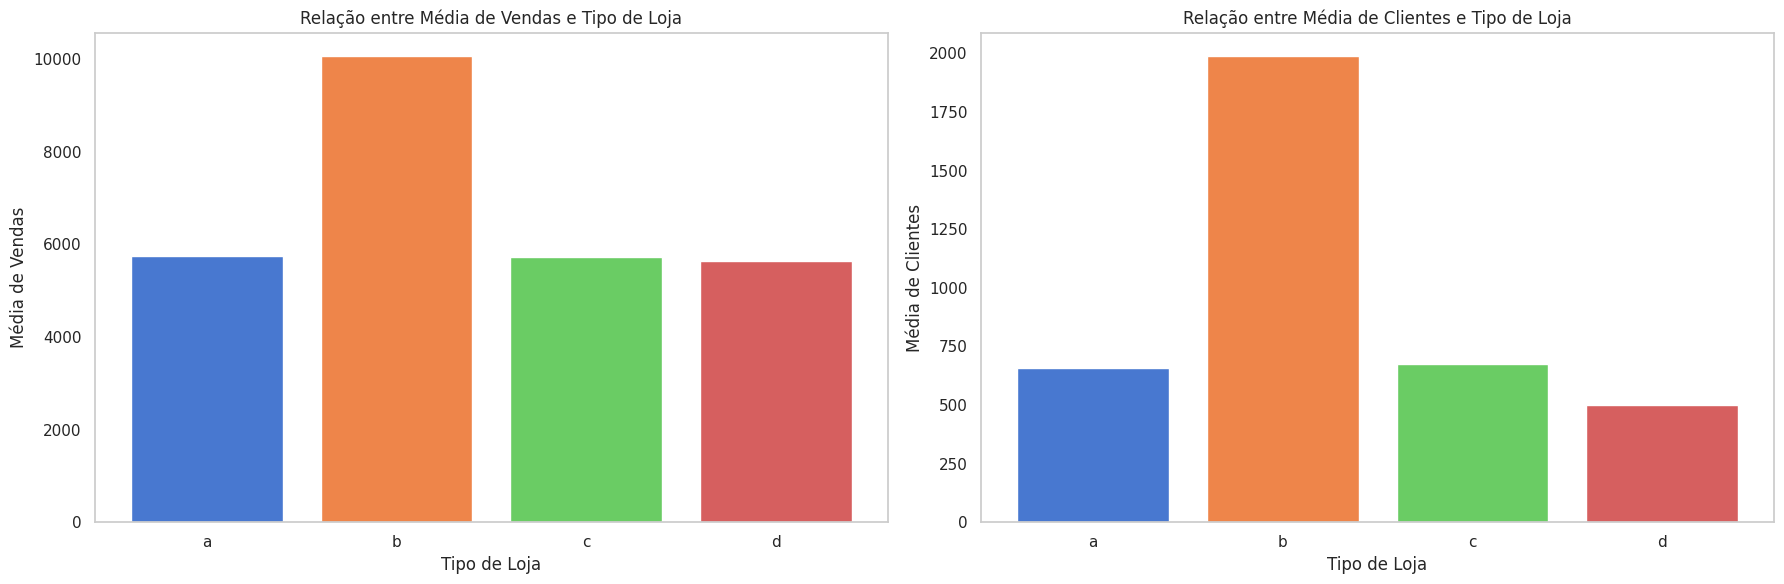

In [ ]:
# fazendo o gráfico dos tipos de loja em relação à média de vendas e de clientes
dois_graficos(base_atualizada, "StoreType", "Tipo de Loja", order_stores)

Analisando os gráficos, podemos perceber que dentre os tipos de loja presentes nas diferentes unidades da Cerreira Fosta, o tipo de loja mais predominante tanto no quesito de vendas e clientes é a loja do tipo 'b'.

A loja do tipo 'b' possui valores muito superiores aos outros tipos de loja.

No quesito de média de vendas, a loja do tipo 'b' possui uma superioridade percentual de aproximadamente 66,7%, já que a média de vendas de 'b' é de aproximadamente 10.000 e as demais lojas possuem uma média de vendas de 6.000. Essa superioridade comprova que lojas do tipo 'b' possuem um desempenho significativamente superior que os demais tipos.

No quesito de clientes nos deparamos num cenário ainda mais distoante, onde 'b' possui uma superioridade percentual de aproximadamente 166.67%, já que a média de clientes de 'b' é de aproximadamente 2.000 e a loja com a segunda maior média de clientes possui aproximadamente 700.

**INSIGHT**: com base nos gráficos e também nas análises, podemos concluir que a loja do tipo 'b' possui um desempenho muito superior às demais lojas. Portanto, a fim de maximizar as vendas da Cerreira Fosta, é indispensável investir em novas unidades com estes tipo de loja, proporcionando maior otimização de vendas para a empresa. Além disso, é importante verificar o que diferencia 'b' dos outros tipos de loja, a fim de implementar as mesmas condições deste tipo de loja para os outros tipos.

### Relação entre nível de sortimento, vendas e clientes

A fim de especificar nosso público-alvo, o próximo passo é observar o quanto o nível de sortimento pode influenciar nos lucros da Cerreira Fosta.

In [ ]:
# guardando em uma lista uma ordem específica de nível de sortimento que queremos que apareça no gráfico
ordem_assortment = ['Básico', 'Extra', 'Estendido']

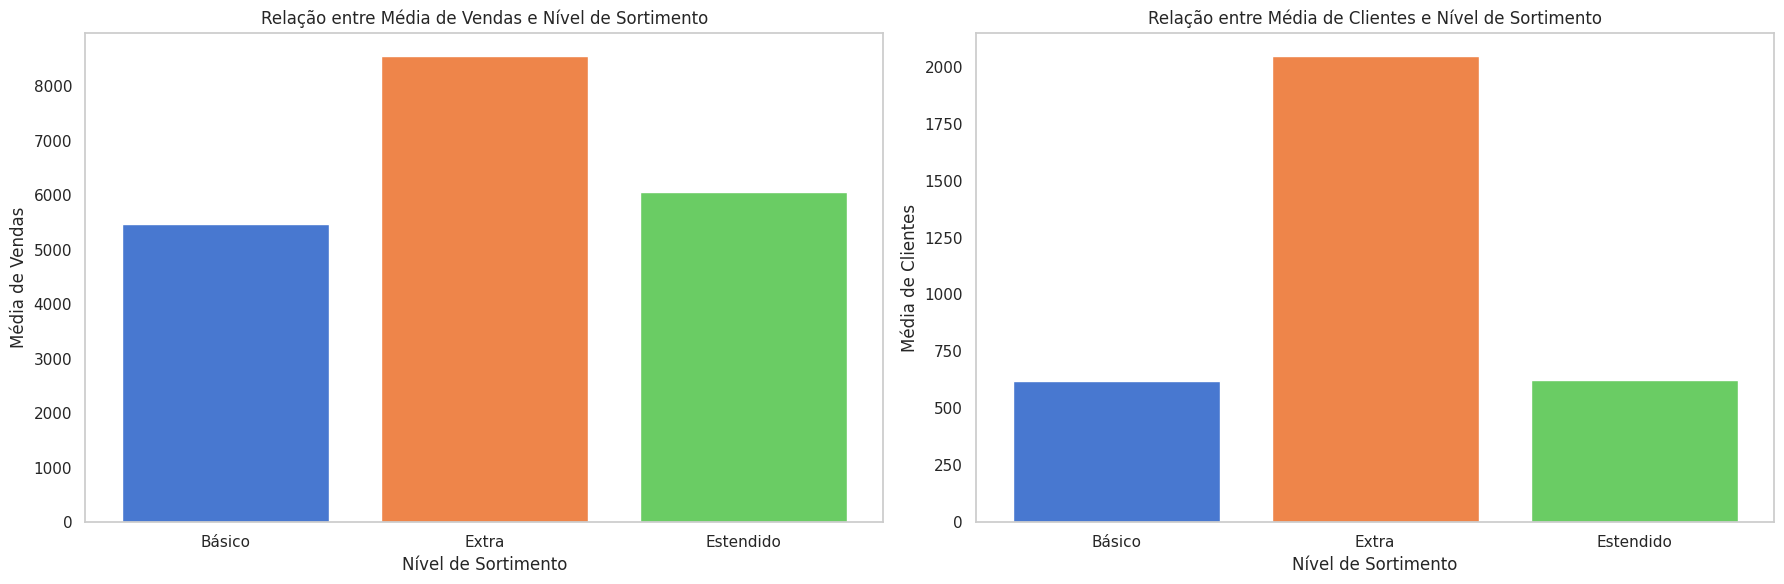

In [ ]:
# fazendo o gráfico do nível de sortimento em relação à média de vendas e de clientes
dois_graficos(base_atualizada, "Assortment", "Nível de Sortimento", ordem_assortment)

Analisando os gráficos, podemos perceber que o nível de sortimento extra se destaca entre os demais níveis de sortimento.

Tanto em relação à média de clientes quanto à média de vendas, as unidades que apresentam este tipo de variedade de produto predomina ocasionando uma grande influência nos lucros da Cerreira Fosta.

Entretanto, vale destacar que as proporções de vendas por cliente se apresentam maiores nos outros tipos de sortimento. Nas unidades com nível de sortimento extra por exemplo, podemos perceber que essa proporção é de 1 cliente para 4 vendas. Vamos analisar melhor essas métricas a fim de obter uma análise mais assertiva.

In [ ]:
# criando o dataframe que possui a média das vendas para cada tipo de assortment
media_vendas_assort = base_atualizada.copy().groupby('Assortment')['Sales'].mean().sort_values(ascending=False)

# criando o dataframe que possui a média do número de clientes para cada tipo de assortment
media_clientes_assort = base_atualizada.copy().groupby('Assortment')['Customers'].mean().sort_values(ascending=False)

In [ ]:
# printando as informações necessárias

print("Proporção de vendas por cliente:\n")

# i -> ['Básico', 'Extra', 'Estendido']
for i in media_vendas_assort.index:
  # fazendo a proporção de quantas vendas para quantos clientes
  print(f"Sortimento {i}: {(media_vendas_assort.loc[i] / media_clientes_assort.loc[i]).round(2)}")

Proporção de vendas por cliente:

Sortimento Extra: 4.18
Sortimento Estendido: 9.71
Sortimento Básico: 8.85


A partir dessa proporção de vendas por cliente, podemos inferir que apesar das unidades com nível de sortimento extra possuírem maior volume de vendas e de clientes, os níveis de sortimento estendido e básico possuem uma maior proporção de vendas por cliente.

Isso indica que os clientes em unidades com esses dois níveis de sortimento tendem a realizar mais vendas.

**INSIGHT**: a partir do gráfico analisado e também das proporções investigadas, podemos inferir que o nível de sortimento que mais gerará volume de lucro será o nível de sortimento extra. Portanto, seria interessante que a Cerreira Fosta produzisse mais unidades com este nível de sortimento a fim de maximizar lucros. Além disso, seria significativo que a empresa também investisse em unidades com nível de sortimento estendido, pois estas unidades possuem uma maior proporção de vendas por pessoa.

### Relação entre promoções, vendas e clientes

Vamos descobrir qual o impacto que as promoções possuem em relação às unidades da Cerreira Fosta.

In [ ]:
# definindo uma ordem nos valores de promoção
ordem_promo = ['Loja em Promoção', 'Não há Promoção']

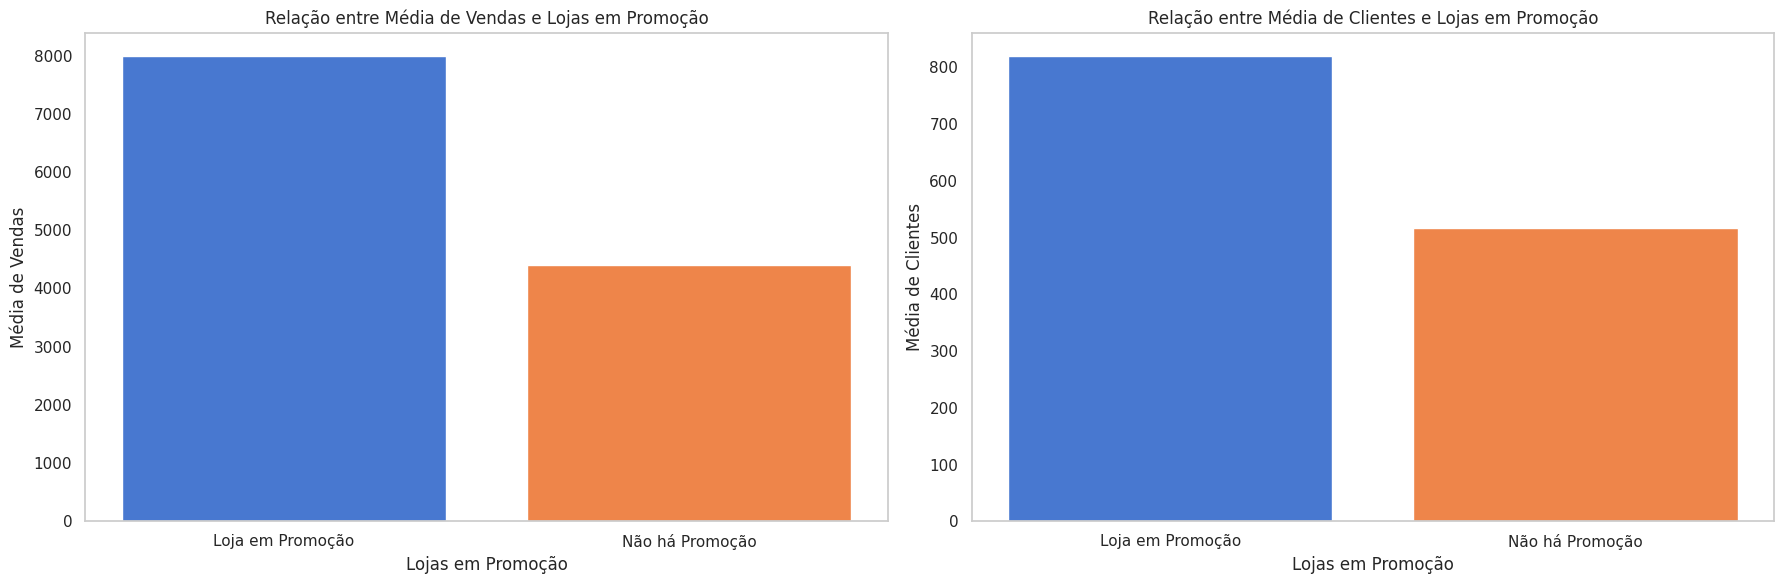

In [ ]:
# fazendo o gráfico das lojas em promoção em relação à média de vendas e de clientes
dois_graficos(base_atualizada, "Promo", "Lojas em Promoção", ordem_promo)

De acordo com ambos os gráficos, podemos notar que nas lojas em promoção há uma diferença considerável tanto no volume de vendas quanto no volume de clientes. Isto significa que as unidades que realizam estas promoções possuem maiores chances de conseguirem impactar positivamente no lucro na Cerreira Fosta.

**INSIGHT**: portanto, é importante que mais unidades realizem promoções a fim de contribuir e ajudar com o lucro total da empresa, causando uma maximização de vendas e uma maior circulação de clientes.

Com estes dados coletados acerca do benefício da inserção de promoções nas lojas, vamos descobrir em quais meses é mais benéfico realizar estas promoções.

#### Relacionando os meses do intervalo de promoções com a média de vendas e de clientes

Primeiramente, vamos checar novamente como os valores desta coluna estão dispostos.

In [ ]:
# checando os diferentes valores da coluna "PromoInterval"
base_atualizada['PromoInterval'].value_counts()

,count
PromoInterval,
Não existe o intervalo dos meses,508031
"Jan,Apr,Jul,Oct",293122
"Feb,May,Aug,Nov",118596
"Mar,Jun,Sept,Dec",97460


Podemos perceber que grande parte dos valores não possuem os meses do ano, porém, a nossa proposta é justamente não trabalhar com estes valores. Para isso, vamos filtrar a base_atualizada para obter apenas as linhas na qual na coluna "PromoInterval" tenha valores dos meses do ano.

Vamos criar um novo dataframe que vai guardar essa filtragem de dados.

In [ ]:
# fazendo uma cópia da base_atualizada para não comprometê-la
base_intervalo = base_atualizada.copy()

In [ ]:
# fazendo uma fitlragem a fim de obter apenas valores que possuam os meses
base_intervalo = base_intervalo[base_intervalo['PromoInterval'] != 'Não existe o intervalo dos meses']

Além disso, vamos separar cada mês do ano em uma nova linha, a fim de obter uma análise mais completa e profunda dos dados para solucionar as dores da Cerreira Fosta.

In [ ]:
# para cada valor de "PromoInterval", vamos realizar um split para transformar a string em uma lista
base_intervalo['PromoInterval'] = base_intervalo['PromoInterval'].str.split(',')

In [ ]:
# após transformar as strings em listas, vamos separar cada elemento da lista como uma nova coluna de base_intervalo
base_intervalo = base_intervalo.explode('PromoInterval')

Vamos checar se obtivemos os valores que almejamos.

In [ ]:
# checando os novos valores da coluna "PromoInterval"
base_intervalo['PromoInterval'].value_counts()

,count
PromoInterval,
Jan,293122
Apr,293122
Jul,293122
Oct,293122
Feb,118596
May,118596
Aug,118596
Nov,118596
Mar,97460


Agora, vamos separar em uma lista uma ordem específica dos meses para serem dispostos no gráfico.

In [ ]:
# guardando a ordem dos meses
ordem_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [ ]:
# resetando o índice, pois quando separamos cada elemento da lista em uma nova linha
# ocorreu que várias linhas possuíam o mesmo índice, que causa erro na hora de realizar o gráfico
base_intervalo = base_intervalo.reset_index()

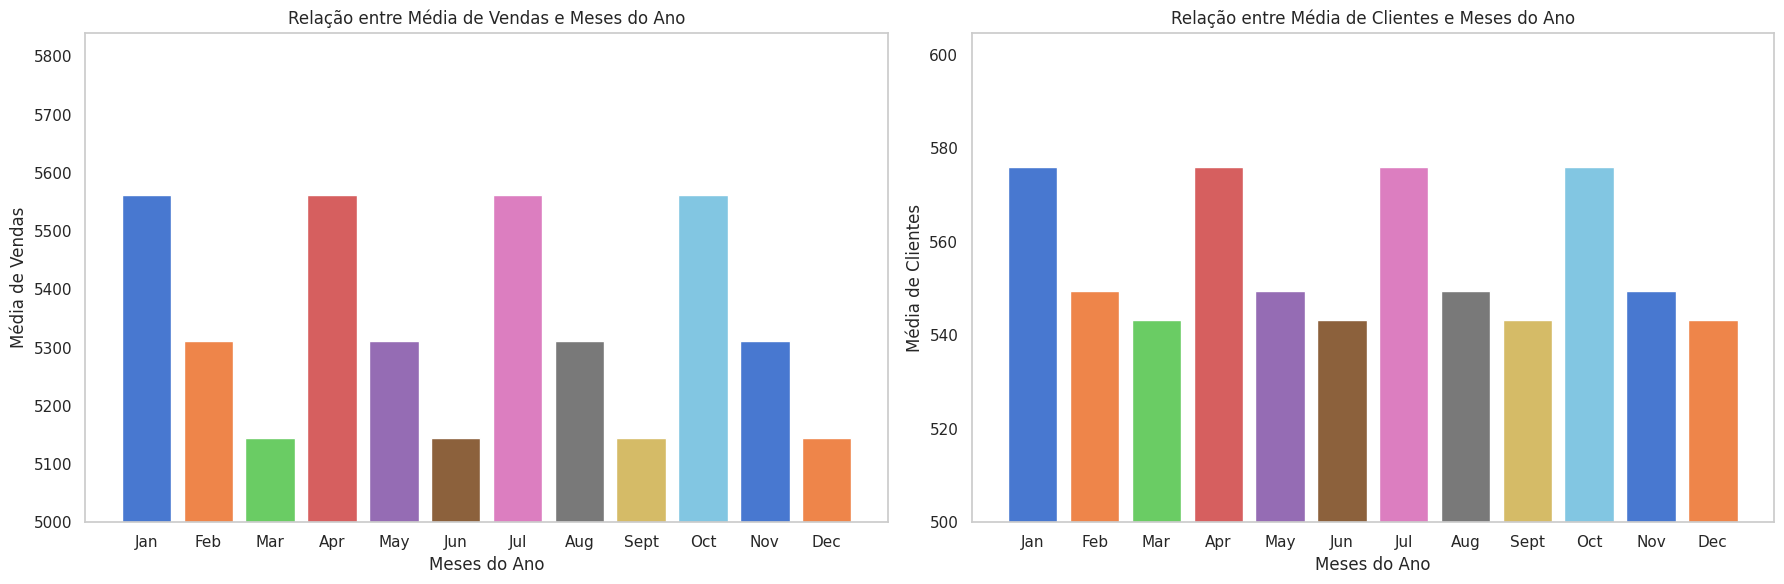

In [ ]:
# fazendo o gráfico dos meses em promoção em relação à média de vendas e de clientes
dois_graficos(base_intervalo, "PromoInterval", "Meses do Ano", ordem_meses, ylim_esquerda=5000, ylim_direita=500)

Podemos perceber que os meses de Janeiro, Abril, Julho e Outubro se destacam dentre as demais, indicando que nestes meses há uma maio atração de clientes proporcionando um maior volume de vendas. Além disso, isto segue um padrão, pois a cada 3 meses partindo de janeiro tanto a média de vendas quanto a média de clientes possui um grande aumento.

**INSIGHT**: com base nos dados convertidos em gráficos, podemos inferir que é importante que a Cerreira Fosta realize promoções principalmente nos meses de Janeiro, Abril, Julho e Outubro realizando um padrão a cada 3 meses a fim de maximizar as vendas pois estes meses possuem uma maior chance de ter oportunidades fechadas.

### Relação entre dias da semana, quantidade de vendas e número de clientes

In [ ]:
# guardando a ordem dos dias que irá ser mostrada no gráfico
ordem_dias = ['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo']

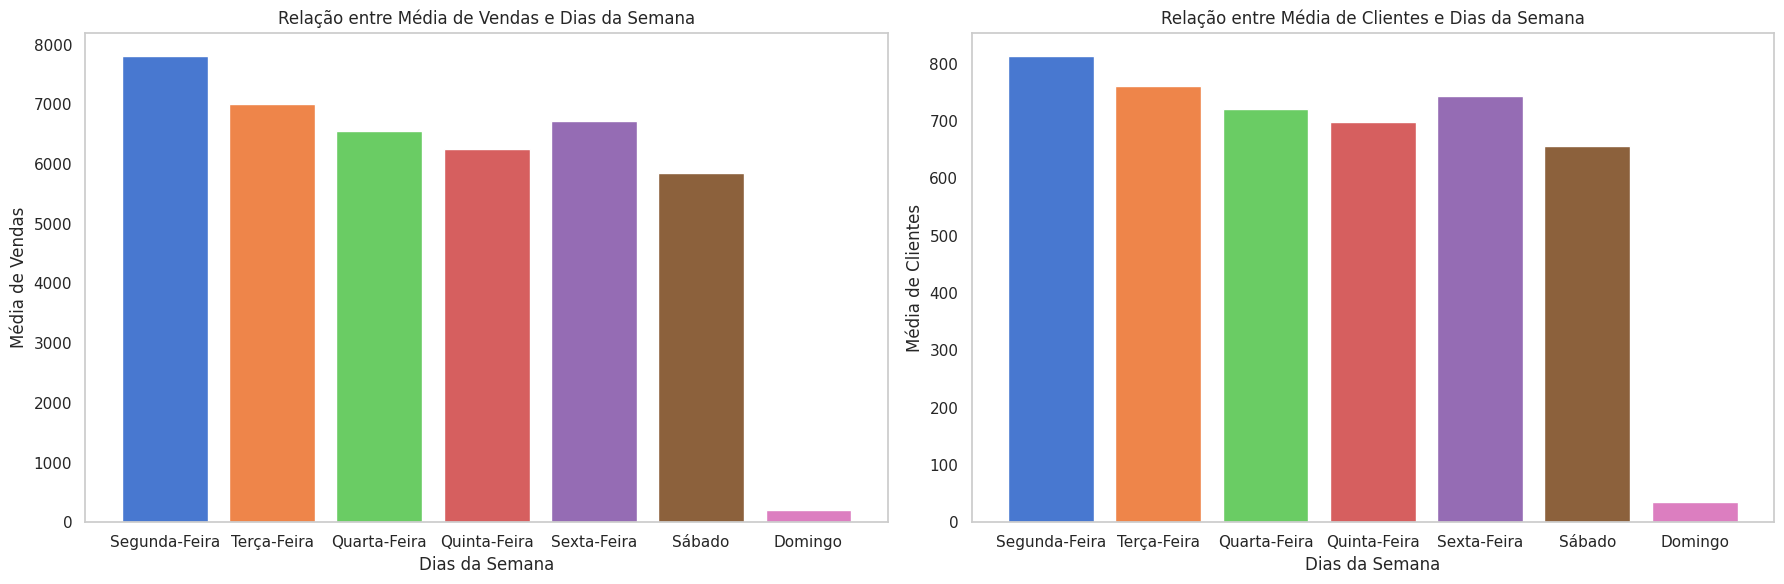

In [ ]:
dois_graficos(base_atualizada, "DayOfWeek", "Dias da Semana", ordem_dias)

Como podemos perceber diante os gráficos, ambos possuem um comportamento de barras bastante similar.

Ambos os gráficos representam dados acerca das vendas e clientes durante o período dos dias 2013-01-01 até o dia 2015-07-31, com base neles podemos explorar insights mais detalhados acerca de quais dias podem ter uma maior chance de obter vendas e circulação de clientes.

De acordo com os gráficos, podemos analisar que as vendas e a circulação de clientes costumam acontecer entre as segundas e sábados com uma boa distribuição de volume de vendas e de clientes entre estes dias.

Entretanto, podemos perceber que a tanto a média de vendas quanto a média de clientes nos dias de domingo são extremamente inferiores se comparada aos outros dias, com uma média de vendas consideravelmente inferior à 1000 vendas e inferior à 100 clientes. Esta discrepância pode indicar que as unidades nestes dias possuem horários reduzidos.

Em relação às outras colunas, podemos perceber que nas segundas-feiras o volume de vendas é o maior com uma média na faixa de 7000 e 8000 vendas neste dia e o volume de clientes também é o maior com uma média de aproximadamente 800 clientes. Já nos sábados podemos perceber que há uma queda visível nas vendas e nos clientes, mesmo sendo um dia tradicionalmente de maior movimento no comércio.

Com estes dois gráficos, podemos novamente perceber a fortíssima relação entre as vendas e os clientes.

Além disso, de acordo com os dados adquiridos, podemos perceber que as unidades possuem maior desempenho de vendas e movimentação de clientes especialmente nas segundas-feiras mas também possui bom desempenho no decorrer das semanas com exceção ao domingo.

**INSIGHT**: Com base nesta análise de dados, podemos concluir que o dia de segunda-feira é o dia mais importante para investir os gasto pois é o dia que trará mais lucros e mais influências nas vendas. Além disso, podemos ter um potencial de crescimento na movimentação de vendas e clientes nos dias de domingo a fim de de trazer mais lucro para a empresa. Este potencial de crescimento pode ser feito através de propagandas chamativas para atrair os clientes e também realizar promoções para que mais vendas sejam efetuadas.

## Análise de concorrentes

Aqui vamos analisar como as lojas concorrentes interferem na média de vendas e clientes das lojas da Cerreira Fosta.


In [ ]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid")

### Relação entre a distância dos concorrentes média de vendas e de clientes

Primeiro, vamos criar uma nova coluna na base_atualizada para guardar o range de distância em quilômetros.

In [ ]:
# Criar faixas para a coluna CompetitionDistance
base_atualizada['CompetitionDistance_bins'] = pd.cut(
    base_atualizada['CompetitionDistance'].replace(' ', 0).astype(float),
    bins=[0, 1000, 5000, 10000, 20000, float('inf')],
    labels=['0-1k', '1k-5k', '5k-10k', '10k-20k', '20k+']
)

Agora vamos criar dois gráficos que relaciona a distância da competição em comparação com a média de vendas e a média de clientes.

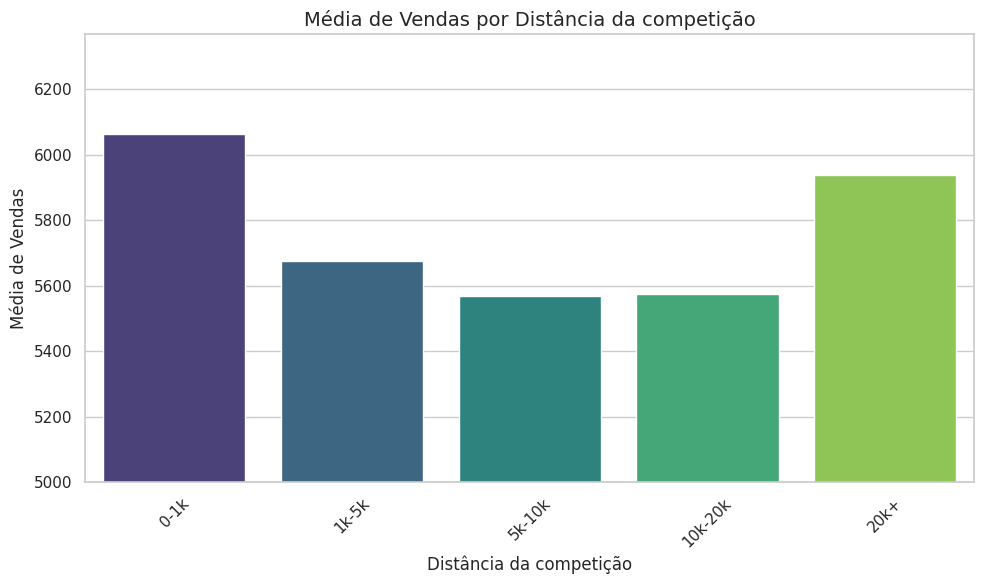

In [ ]:
# Gráfico para Sales por CompetitionDistance_bins
plot_bar_relation(
    data=base_atualizada,
    x_col='CompetitionDistance_bins',
    y_col='Sales',
    title="Média de Vendas por Distância da competição",
    xlabel='Distância da competição',
    ylabel='Média de Vendas',
    ylim=5000
)

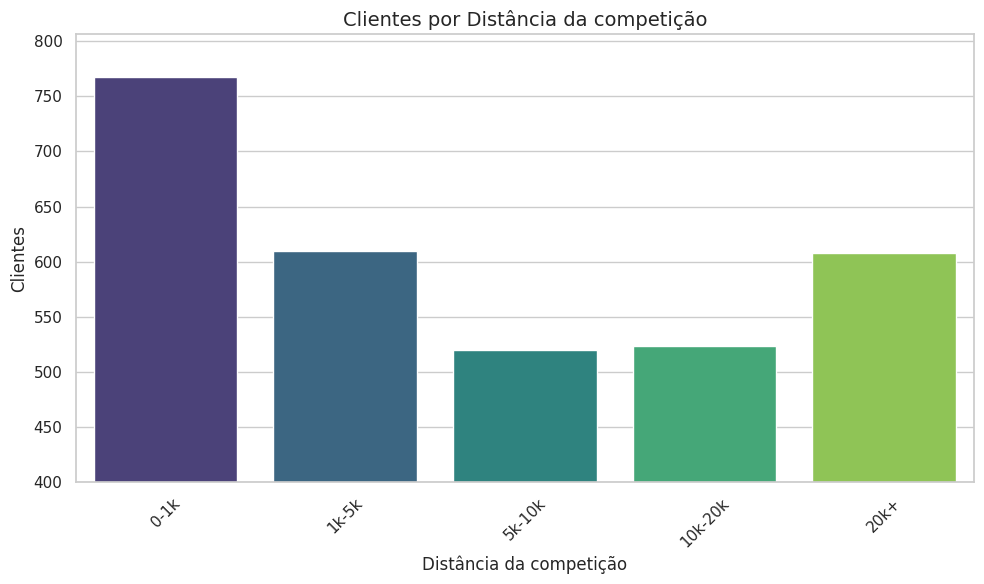

In [ ]:
# Gráfico para Customers por CompetitionDistance_bins
plot_bar_relation(
    data=base_atualizada,
    x_col='CompetitionDistance_bins',
    y_col='Customers',
    title="Clientes por Distância da competição",
    xlabel='Distância da competição',
    ylabel='Clientes',
    ylim=400
)

Analisado os gráficos, é possível perceber que há uma maior movimentação de pessoas e de vendas nos casos extremos, ou seja, quando existem concorrentes diretos ou quando não existe competição por perto, porém, é percepitível que as unidades da Cerreira Fosta possuem um maior volume de vendas e de clientes quando as lojas concorrentes estão em até 1km de distância. Isso pode mostrar que é uma boa iniciativa estabelecer lojas próximas de lojas rivais, aproveitando a movimentação que já existe na área.


**INSIGHT**: de acordo com os gráficos analisados, podemos inferir que as unidades da Cerreira Fosta possui uma vantagem dos clientes em relação às lojas concorrentes mais próximas ou mais distantes. Por isso, é interessante que a Cerreira Fosta construa unidades próximas de lojas rivais, visto que ela possui vantagem sobre elas.

### Mês de criação da competição relacionado com a média de vendas e de clientes

Agora vamos analisar como os meses de abertura da concorrência interferem no desempenho das lojas da Cerreira Fosta, e ver possíveis tomadas de decisões que pode ser feitas visando um aumento do fluxo de caixa.

In [ ]:
ordem_meses_concorrentes = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

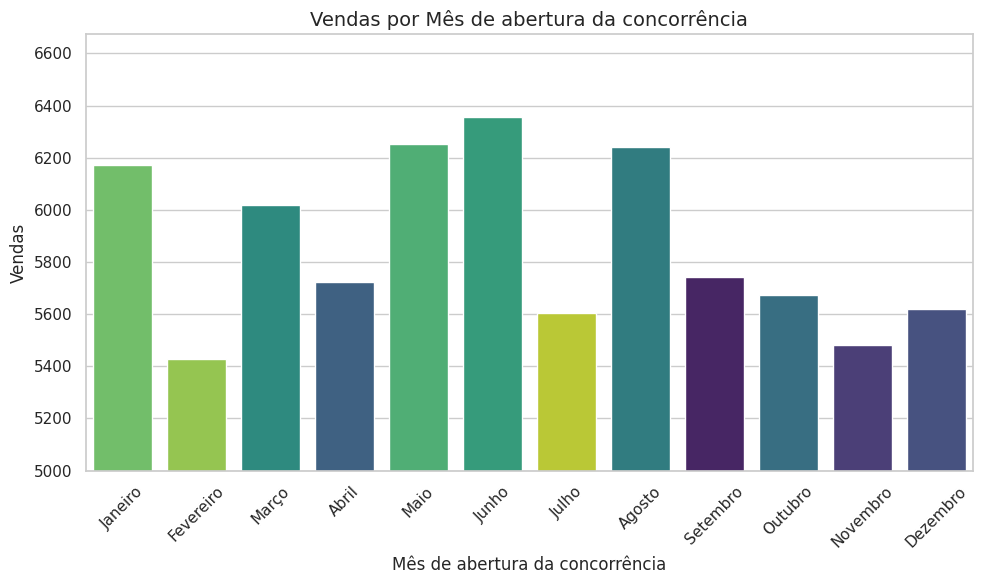

In [ ]:
# Gráfico para Sales por CompetitionOpenSinceMonth
plot_bar_relation(
    data=base_atualizada,
    x_col='CompetitionOpenSinceMonth',
    y_col='Sales',
    title="Vendas por Mês de abertura da concorrência",
    xlabel='Mês de abertura da concorrência',
    ylabel='Vendas',
    ordem_especifica=ordem_meses_concorrentes,
    ylim=5000
)

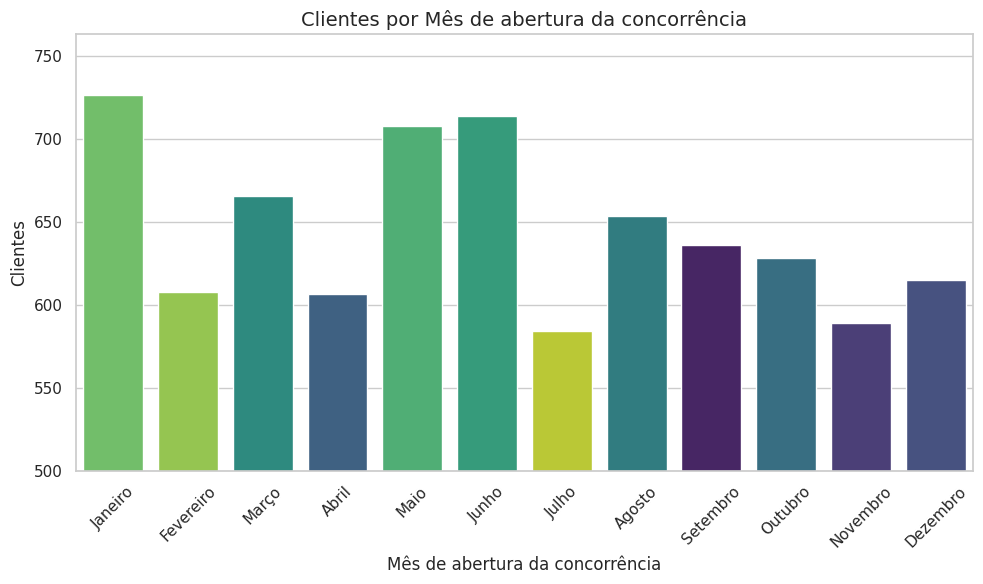

In [ ]:
# Gráfico para Customers por CompetitionOpenSinceMonth
plot_bar_relation(
    data=base_atualizada,
    x_col='CompetitionOpenSinceMonth',
    y_col='Customers',
    title="Clientes por Mês de abertura da concorrência",
    xlabel='Mês de abertura da concorrência',
    ylabel='Clientes',
    ordem_especifica=ordem_meses_concorrentes,
    ylim=500
)

Os gráficos apresentam a relação entre os meses de abertura da concorrência e o desempenho das lojas em termos de vendas e número de clientes. Com base nos dois gráficos, podemos observar padrões importantes que podem direcionar estratégias para maximizar resultados.

Podemos observar que entre os meses de janeiro e julho há um grande volume de vendas e clientes, indicando que as concorrências abertas nesse período não influenciam no lucro da Cerreira Fosta. Porém, podemos observar que entre setembro e dezembro há uma diminuição no volume de vendas e clientes.

**INSIGHT**: com base nos gráficos analisados, é de suma importância que a Cerreira Fosta planeje eventos especiais, promoções e ofertas durante o período de janeiro à junho a fim de capitalizar o alto volume de clientes e vendas. Além disso, é importante realizar campanhas mais direcionadas durante os meses de setembro à dezembro para estimular o fluxo de clientes.

### Ano de criação da competição relacionado com a média de vendas e de clientes

Agora vamos analisar como os anos de abertura da concorrência interferem no desempenho das lojas da Cerreira Fosta, e ver possíveis tomadas de decisões que pode ser feitas visando um aumento do fluxo de caixa.

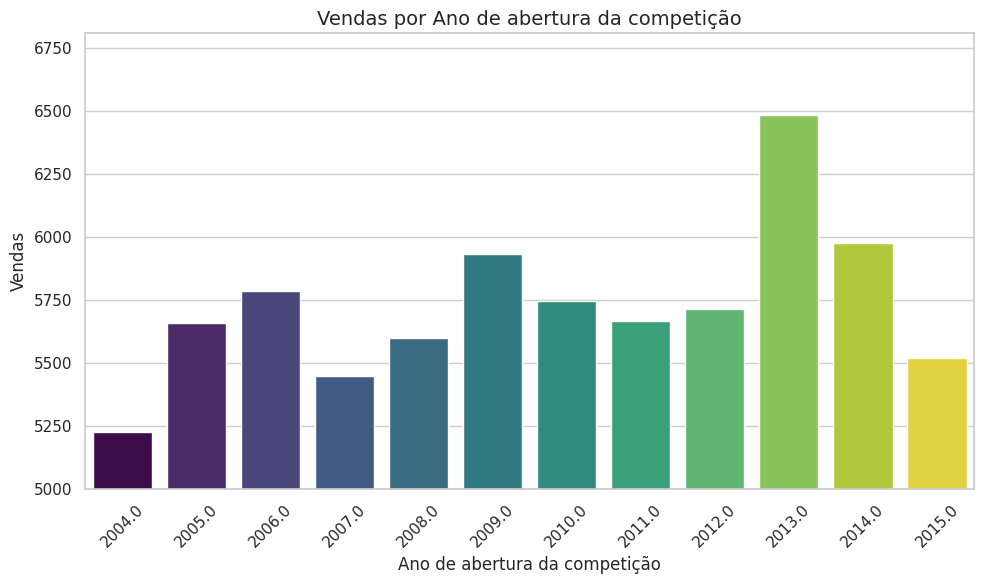

In [ ]:
# Gráfico para Sales por CompetitionOpenSinceYear
plot_bar_relation(
    data=base_atualizada,
    x_col='CompetitionOpenSinceYear',
    y_col='Sales',
    title="Vendas por Ano de abertura da competição",
    xlabel='Ano de abertura da competição',
    ylabel='Vendas',
    ylim=5000
)

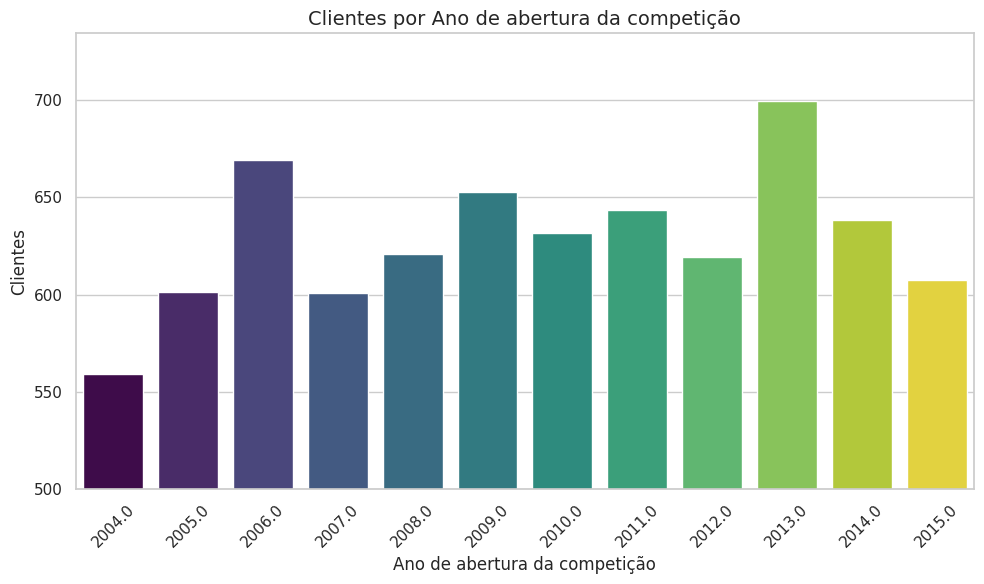

In [ ]:
# Gráfico para Customers por CompetitionOpenSinceYear
plot_bar_relation(
    data=base_atualizada,
    x_col='CompetitionOpenSinceYear',
    y_col='Customers',
    title="Clientes por Ano de abertura da competição",
    xlabel='Ano de abertura da competição',
    ylabel='Clientes',
    ylim=500
)

De acordo com os gráficos, podemos analisar que houve um crescimento tanto na média de clientes quanto na média de vendas conforme o ano de abertura de concorrência se aproxima de 2013.

Entretanto, podemos observar que o volume de vendas e de clientes tiveram uma leve reduzida nos anos de 2014 e 2015 indicando uma maior influência da concorrência nestes anos.

**INSIGHT**: é importante analisar o que foi realizado em 2013 nas unidades da Cerreira Fosta a fim de entender o causador do aumento de vendas e clientes. Entender este comportamento pode ser essencial para ser aplicado nas atuais e futuras unidades da Cerreira Fosta. Além disso, é importante definir estratégias de marketing para atrair mais clientes visto a redução da média de clientes e de vendas observada recentemente.

# Análise Multivariada

Nesta etapa, iremos explorar como as demais colunas da base de dados se relacionam entre si e se relacionam com as vendas e clientes das unidades da Cerreira Fosta Ltda.

Vamos analisar um pouco melhor o quanto as colunas de vendas e de clientes conseguem se relacionar com mas de uma coluna da base de dados.

## Correlação entre dias da semana com promoções

Vamos checar o quanto as promoções podem influenciar cada dia da semana.

Primeiramente, vamos filtrar o dataframe para obter apenas os valores em que ocorrem promoções.

In [ ]:
# criando um data frame provisório para guardar apenas os valores de quando houver promoções
base_promo = base_atualizada[base_atualizada['Promo'] == 'Loja em Promoção']

Agora, vamos fazer gráficos para realizar as análises.

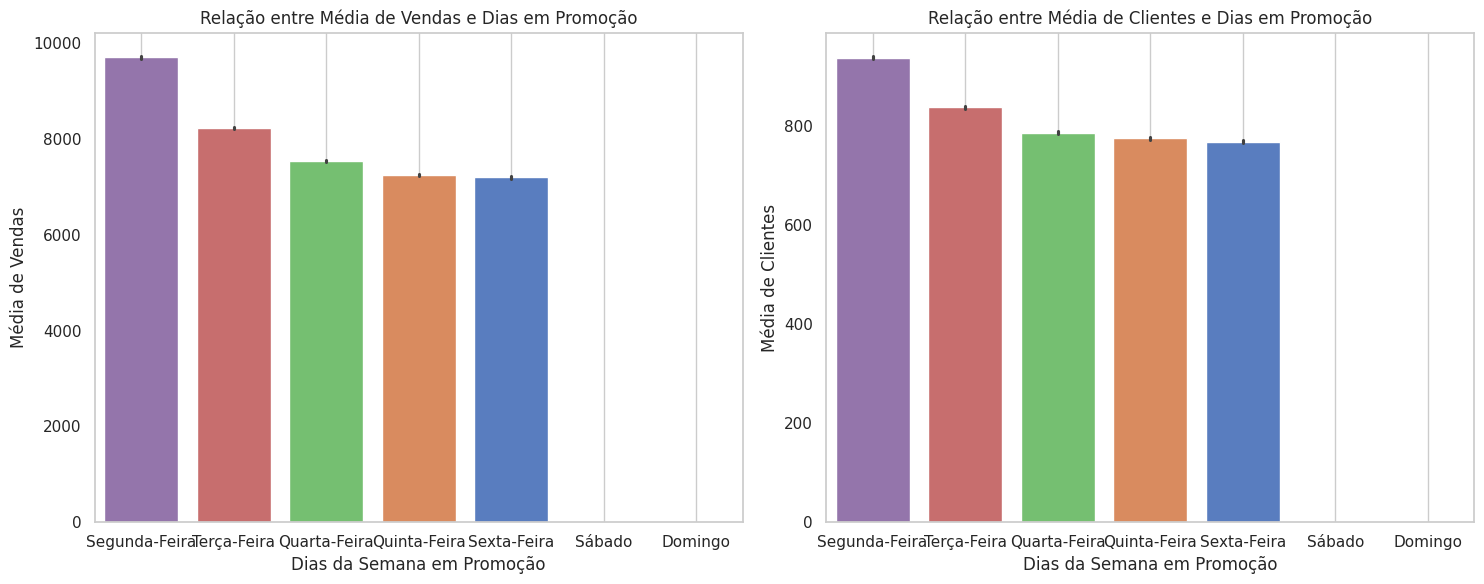

In [ ]:
# fazendo dois gráficos dos dias em que há promoção em relação às vendas e clientes

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="DayOfWeek", y="Sales", data=base_promo, order=ordem_dias, hue='DayOfWeek', palette='muted', legend=False)
plt.title("Relação entre Média de Vendas e Dias em Promoção")
plt.xlabel("Dias da Semana em Promoção")
plt.ylabel("Média de Vendas")
plt.tight_layout()
plt.grid()

plt.subplot(1, 2, 2)
sns.barplot(x="DayOfWeek", y="Customers", data=base_promo, order=ordem_dias, hue='DayOfWeek', palette='muted', legend=False)
plt.title("Relação entre Média de Clientes e Dias em Promoção")
plt.xlabel("Dias da Semana em Promoção")
plt.ylabel("Média de Clientes")

plt.tight_layout()
plt.grid()
plt.show()

De acordo com os gráficos, podemos analisar que nos dias de sábado e domingo as unidades da Cerreira Fosta não entram em promoção. Isto pode ser um indicativo do porquê o número de vendas e de clientes sofreram uma decaída de movimentação, que foi analisado no gráfico anterior.

Em relação aos demais dias da semana, podemos notar que em dias promoção há uma maior movimentação tanto de vendas quanto de clientes nestes dias.

Novamente, a segunda-feira é o dia mais movimentado tanto em relação às vendas quanto em relação aos clientes. Podemos perceber que nesta coluna em específico a média de vendas é de aproximadamente 10.000 e a média de vendas é bastante superior à 800, representando um aumento percentual expressivo.

Outra observação importante é em relação à coluna de sexta-feira, ao qual se analisarmos apenas os dias com promoções as médias de vendas são bastante simulares à média de vendas de quinta-feira mas se analisarmos todos os dias as vendas e número de clientes de sexta-feira é superior.

Vamos analisar matematicamente o quanto a promoção influenciou a média de vendas e de clientes a fim de entender um pouco melhor o impacto que as promoções causam na movimentação financeira das unidades.

Primeiro, vamos checar o quanto as promoções impactam a média de vendas das unidades. Para isso, vamos criar uma função que retorna um dataframe agrupado pelos dias com a média de clientes e de vendas a fim de otimizar o código.

In [ ]:
# criando uma função que vai retornar um dataframe agrupado

def relacionar(coluna, coluna_a_agrupar):
  media_sem_promocao = base_atualizada.copy().groupby(coluna)[coluna_a_agrupar].mean()

  # transformando os indices em uma categoria ordenada baseada na variavel ordem_dias
  media_sem_promocao.index = pd.Categorical(
      media_sem_promocao.index,
      categories=ordem_dias,
      ordered=True
  )

  # ordenando o dataframe com base nos indices
  media_sem_promocao = media_sem_promocao.sort_values(ascending=False)

  # criando o dataframe que possui a média de vendas para cada dia da semana apenas em promoção
  media_com_promocao = base_promo.copy().groupby(coluna)[coluna_a_agrupar].mean().sort_values()

  # transformando os indices em uma categoria ordenada baseada na variavel ordem_dias
  media_com_promocao.index = pd.Categorical(
      media_com_promocao.index,
      categories=ordem_dias,
      ordered=True
  )

  # ordenando o dataframe com base nos indices
  media_com_promocao = media_com_promocao.sort_values()

  # retornando ambos os dataframes
  return media_sem_promocao, media_com_promocao

In [ ]:
media_vendas, media_vendas_promo = relacionar('DayOfWeek', 'Sales')

for i in media_vendas.index:
  try:
    # calculando a diferença entre a média de vendas somente em dias de promoção e todos os dias
    print(f"Diferença na média de vendas na {i}: {(media_vendas_promo.loc[i] - media_vendas.loc[i]).round(2)}")
  except:
    pass

Diferença na média de vendas na Segunda-Feira: 1898.76
Diferença na média de vendas na Terça-Feira: 1222.67
Diferença na média de vendas na Sexta-Feira: 479.27
Diferença na média de vendas na Quarta-Feira: 998.14
Diferença na média de vendas na Quinta-Feira: 1011.92


Como observado acima, todos os dias possuem aumentos significativos na média de vendas quando ocorrem promoções se comparado com todos os dias.

Agora, vamos analisar também o quanto a circulação de clientes em cada dia da semana é impactado pela promoção.

In [ ]:
media_clientes, media_clientes_promo = relacionar('DayOfWeek', 'Customers')

for i in media_clientes.index:
  try:
    # calculando a diferença entre a média de vendas somente em dias de promoção e todos os dias
    print(f"Diferença na média de clientes na {i}: {(media_clientes_promo.loc[i] - media_clientes.loc[i]).round(2)}")
  except:
    pass

Diferença na média de clientes na Segunda-Feira: 124.08
Diferença na média de clientes na Terça-Feira: 75.46
Diferença na média de clientes na Sexta-Feira: 23.87
Diferença na média de clientes na Quarta-Feira: 63.94
Diferença na média de clientes na Quinta-Feira: 76.49


Como podemos notar, a média de circulação de clientes também é afetada positivamente durantes os dias em que ocorrem promoções.


Então, podemos concluir que todos os dias em exceção ao sábado e domingo possuem um aumento em relação à média de vendas e de clientes.

**INSIGHT**: de acordo com as análises dos gráficos, podemos reiterar que as promoções geram resultados satisfatórios para as movimentações financeiras das unidades da Cerreira Fosta. Portanto, é importante continuar estas promoções principalmente nestes dias de semana pois podem contribuir com o sucesso de vendas. Dentre os dias analisados, é imporante realizar estas promoções principalmente nas segundas-feiras, onde as movimentações de média de vendas chegaram perto de 10.000 vendas e a média de clientes superou a média de 800.

## Análise sobre as colunas acerca dos picos de vendas

Foi levantado um ponto interessante sobre os dias em que ocorreram picos de vendas extremamente altos. Esses dias representam eventos atípicos que podem estar relacionados a promoções, sazonalidades ou outros fatores específicos. Para entender melhor, vamos filtrar os dados para incluir apenas os dias com mais de 20.000 vendas, um valor que vai ser considerado como dia de sucesso de vendas.

Objetivo: Identificar e analisar os possíveis fatores que influenciaram esses dias com vendas excepcionalmente altas, o que pode ajudar na formulação de estratégias futuras.

In [ ]:
# Filtrando os dados para incluir apenas dias com vendas acima de 20.000
vendas_altas = base_atualizada[base_atualizada['Sales'] > 20000]

<ipython-input-142-a7a6ab40430a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vendas_altas, x='Assortment', palette='viridis', ax=axes[0])


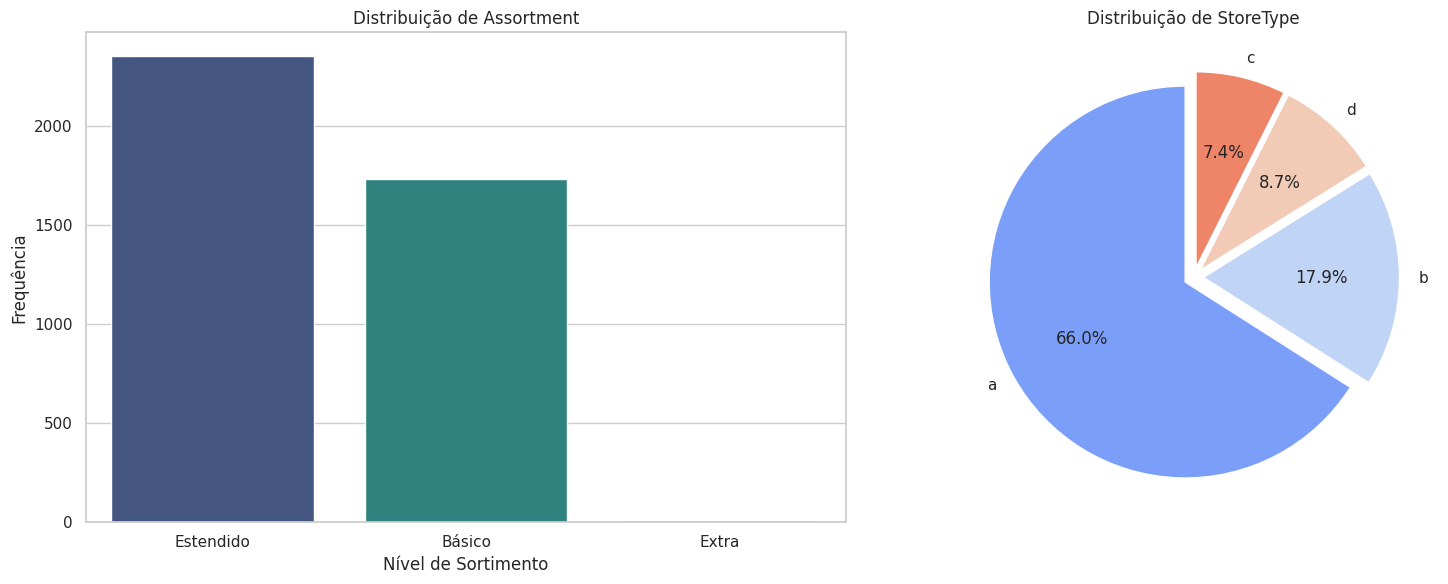

In [ ]:
# Configurando subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras - Assortment
sns.countplot(data=vendas_altas, x='Assortment', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição de Assortment')
axes[0].set_xlabel('Nível de Sortimento')
axes[0].set_ylabel('Frequência')

# Gráfico de pizza - StoreType
vendas_altas['StoreType'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm', len(vendas_altas['StoreType'].unique())),
    explode=[0.05]*len(vendas_altas['StoreType'].unique()),
    ax=axes[1]
)
axes[1].set_title('Distribuição de StoreType')
axes[1].set_ylabel('')  # Remove o rótulo do eixo Y

# Ajustando o layout
plt.tight_layout()
plt.show()

Insight:

- Os gráficos filtrados para vendas acima de 20.000 revelam informações importantes sobre o desempenho das lojas. No gráfico de barras, observa-se que a maioria das lojas que alcançam vendas de sucesso possuem o nível de sortimento "Estendido". Isso indica que lojas com maior variedade de produtos tendem a apresentar melhores resultados de vendas. Em contrapartida, lojas com sortimento "Básico" têm menor frequência nas vendas altas, e o nível "Extra" é praticamente inexistente, sugerindo que ampliar o portfólio de produtos pode ser uma estratégia relevante para impulsionar as vendas.

- No gráfico de pizza, fica evidente que 66% das vendas de sucesso ocorrem em lojas do tipo "a", o que demonstra o domínio desse tipo de loja no desempenho de vendas. Os tipos "b" e "d" aparecem em menor proporção, com 17,9% e 8,7%, respectivamente, enquanto o tipo "c" possui apenas 7,4% de participação. Isso sugere que fatores como o layout, localização ou público-alvo das lojas do tipo "a" são determinantes para o sucesso nas vendas.

- Esses resultados indicam que, para melhorar o desempenho geral, a empresa pode revisar o portfólio de produtos e ampliar o sortimento em outras lojas. Além disso, é possível priorizar investimentos nas lojas do tipo "a", que mostram maior potencial de vendas, enquanto uma análise mais detalhada das lojas dos tipos "b", "c" e "d" pode ajudar a identificar barreiras de desempenho e propor melhorias estratégicas.

Vamos agora checar quais são os dias da semana que mais influenciam estes picos de vendas.

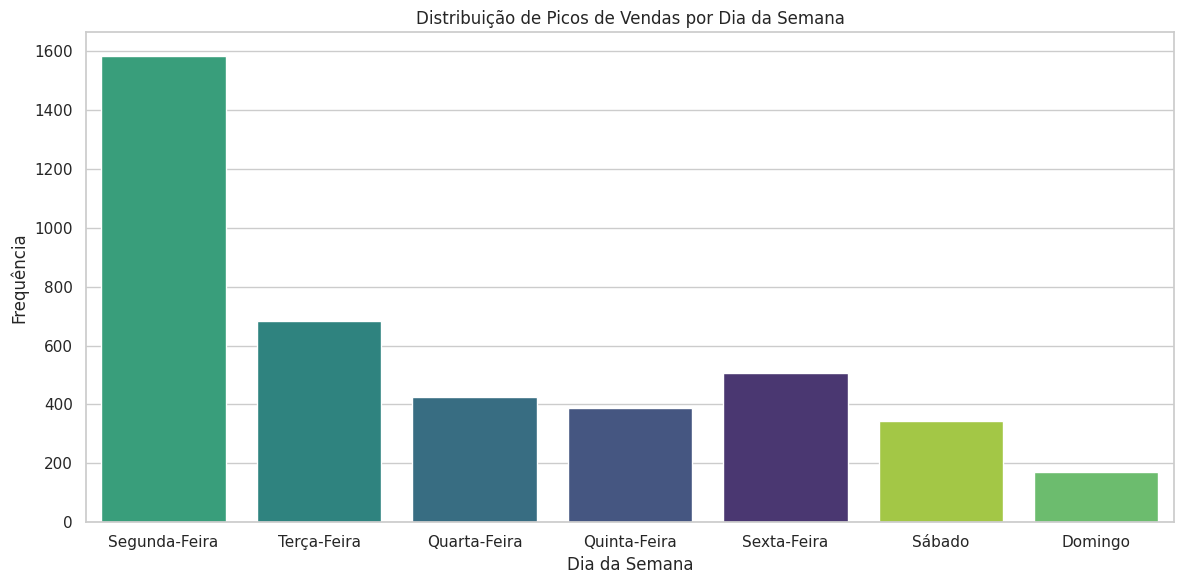

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data=vendas_altas, x='DayOfWeek', palette='viridis', order=ordem_dias, hue='DayOfWeek')
plt.title('Distribuição de Picos de Vendas por Dia da Semana')
plt.ylabel("Frequência")
plt.xlabel("Dia da Semana")

plt.tight_layout()
plt.show()

Além disso, vamos analisar o quanto as promoções influenciaram estes picos de venda a fim de obter uma análise mais direcionada.

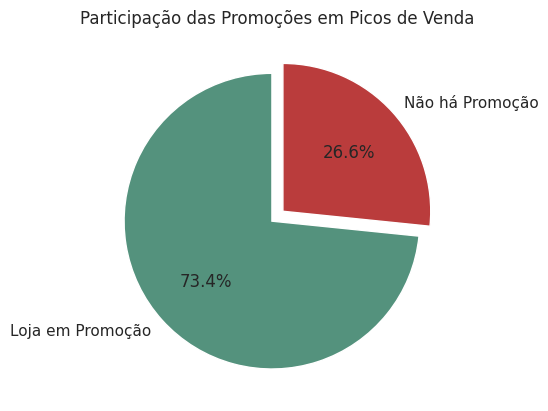

In [ ]:
# fazendo um gráfico de pizza mostrando as proporções entre dias em promoção
plt.pie(
    vendas_altas['Promo'].value_counts(),
    labels=vendas_altas['Promo'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette(['#54927d', '#ba3c3c']),
    explode=[0.05]*len(vendas_altas['Promo'].unique()),
)

plt.title('Participação das Promoções em Picos de Venda')
plt.show()

**INSIGHT**:
- Com base no gráfico de pizza gerado a partir dos picos de venda, podemos observar que as promoções possuem um enorme impacto nesses grandes volumes de vendas.
- Esse resultado indica que as promoções nas unidades da Cerreira Fosta apresentam um grande impacto positivo nos lucros da empresa. Portanto, é importante realizar promoções nas unidades a fim de maximizar o volume de vendas.

A fim de ter aplicar corretamente estas promoções, vamos analisar em quais épocas e dias essas promoções vão melhor impactar nos lucros da Cerreira Fosta.

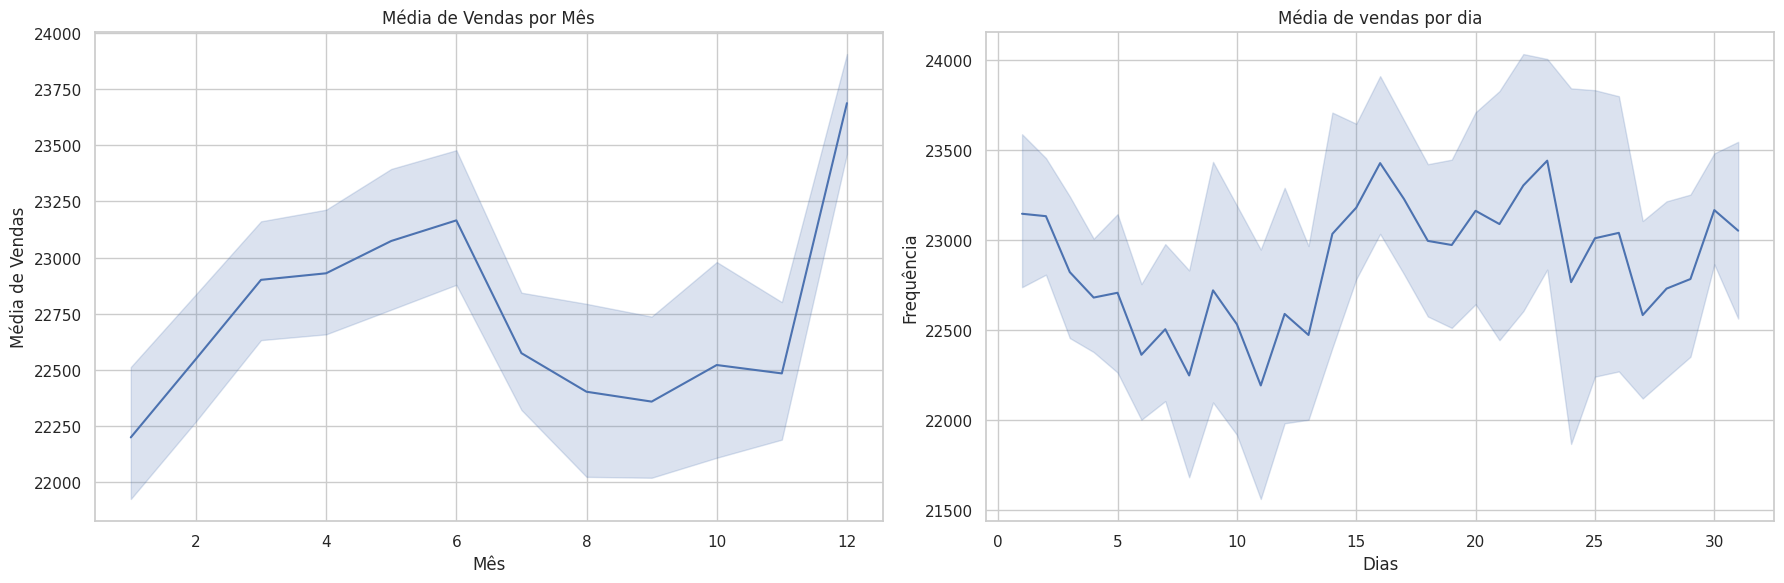

In [ ]:
plt.figure(figsize=(18, 6))

# gráfico de linha sobre a média de vendas por mês baseado no pico de vendas
plt.subplot(1, 2, 1)
sns.lineplot(data=vendas_altas, x='Meses', y='Sales')
plt.title('Média de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Vendas')

# gráfico de linha sobre a média de vendas por mês baseado no pico de vendas
plt.subplot(1, 2, 2)
sns.lineplot(data=vendas_altas, x='Dias', y='Sales')
plt.title('Média de vendas por dia')
plt.ylabel("Frequência")
plt.xlabel("Dias")

plt.tight_layout()
plt.show()

**INSIGHT**:
- Sobre o gráfico de vendas por mês, é perceptível que o mês de dezembro é o mês que mais se destaca positivamente. Isto pode ser explicado devido a influência de fatores sazomais ao qual as pessoas movimentam-se bastante para comprar presentes.
 - Além disso, vale destacar que entre os meses de janeiro e junho houve um aumento gradual na média de vendas.
 - Como o gráfico possui um pico de vendas claro, é importante direcionar e orientar estratégias de marketing nesse período de dezembro.

- Sobre o gráfico de vendas por dia, podemos observar que as vendas variam significativamente ao longo dos dias.
 - Entretanto, podemos perceber que os primeiros 10 dias possuem uma diminuição gradual das vendas e após isso aumento considerável e estabilização até o final do mês.
 - Com base nisso, é mais interessante ajustar campanhas para a segunda metade dos meses, onde possuem uma média de vendas significativamente maior que a primeira metade.